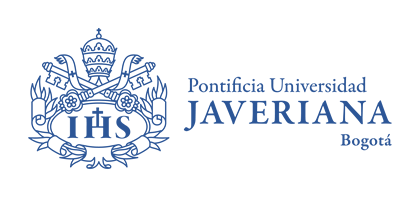

# Aprendizaje de máquina - Taller 2 - Redes neuronales artificiales
En este notebook vamos a explorar implementaciones de redes neuronales feedforward en usando la librería scikit-learn y se propone el enunciado del taller 2 del curso.

## Hector Gomez Parra
## Daniel Tovar

## Setup

Importaremos las librerías necesarias para el ejercicio

In [ ]:
import pandas as pd
import numpy as np
from sklearn import pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Redes neuronales artificiales feedforward

Las redes neuronales de alimentación hacia adelante son modelos de aprendizaje de máquina que conectan las unidades neuronales en capas. Estos modelos tienen una capa de entrada que recibe las instancias, una o más capas intermedias o capas ocultas, y una capa de salida o final que da la respuesta según el problema a resolver (regresión o clasificación). Las unidades neuronales de una capa reciben las activaciones de todas las unidades neuronales de la capa anterior y conectan su activación a todas las unidades neuronales de la capa siguiente.


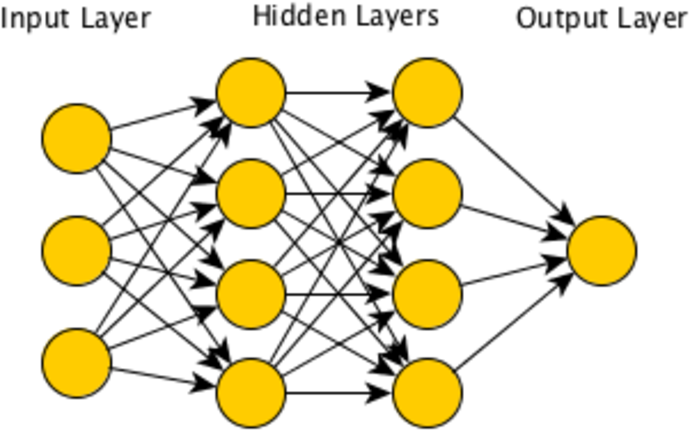

Las redes neuronales artificiales de alimentación hacia adelante son modeladores universales de funciones siempre y cuando se puedan añadir [suficientes unidades neuronales o suficientes capas](https://en.wikipedia.org/wiki/Universal_approximation_theorem)






## Ejercicio - Espirales

Ilustremos inicialmente el uso del modelo de clasificación de redes neuronales utilizando el ejemplo de las espirales que no eran separables por el perceptrón o ADALINE.




In [ ]:
N=1000

In [ ]:
def twospirals(n_points, noise=.5):
    """
     Returns the two spirals dataset.
    """
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))),
            np.hstack((np.zeros(n_points),np.ones(n_points))))

X, y = twospirals(N)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [ ]:
X_train.shape

(1600, 2)

In [ ]:
X_test.shape

(400, 2)

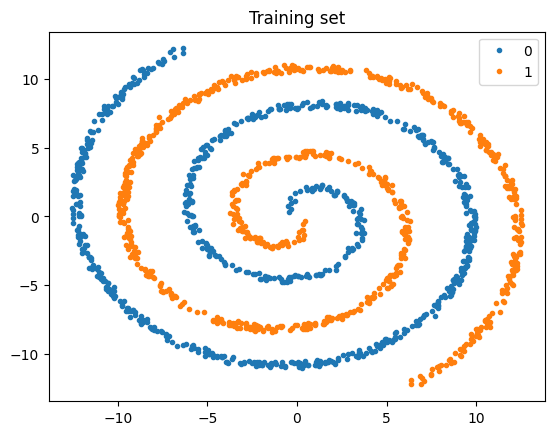

In [ ]:
plt.title('Training set')
plt.plot(X_train[Y_train==0,0], X_train[Y_train==0,1], '.', label=0)
plt.plot(X_train[Y_train==1,0], X_train[Y_train==1,1], '.', label=1)
plt.legend()
plt.show()

### Partición datos en entrenamiento, validación y test

A continuación crearemos 3 datasets a partir del dataset no separable linealmente

In [ ]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:

X_val,X_test, y_val,y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

In [ ]:
len(X_train)

1600

In [ ]:
len(X_val)

200

In [ ]:
len(X_test)

200

## Construcción del modelo utilizando Tensorflow/Keras

Keras es una librería integrada con TensorFlow para el desarrollo rápido de modelos de aprendizaje de máquina. Keras implementa abstracciones comunes para problemas de aprendizaje profundo como capas, optimizadores, funciones de pérdida y regularización, entre otros.

La clase Sequential ([documentación](https://keras.io/api/models/sequential/)) permite inicializar un modelo feedforward vacío al que vamos a ir añadiendo capas densas

In [ ]:
model=keras.Sequential()

En el paquete [layers](https://keras.io/api/layers/) de keras, ya están implementadas diferentes tipos de capas a añadir a una red neuronal. En nuestro caso vamos a usar una capa densa para construir una red feed-forward. Para esto vamos a usar una capa [Dense](https://keras.io/api/layers/core_layers/dense/)

La capa Dense debe recibir el número de unidades neuronales de la capa, en este caso vamos a usar 16 neuronas en una única capa.

Otros parámetros importantes que debemos indicar al inicializar una capa son:


*   activation: El tipo de función de activación de las unidades neuronales de la capa
*   input_shape: Cuando es la primera capa debemos indicar el tamaño de elementos que se esperan (forma del vector que se alimenta como instancia)



In [ ]:
model.add(layers.Dense(8, activation='relu', input_shape=(len(X_train[1]),)))

La última capa que se añade al modelo es la capa de salida, en este caso como es un problema de clasificación binaria, debemos usar la activación sigmoide para una única neurona de salida.

In [ ]:
model.add(layers.Dense(1, activation='sigmoid'))

Una vez finalizada la construcción del modelo, se pasa a compilarlo. En la compilación establecemos principalmente 2 elementos:

*   El algoritmo de optimización que se va a aplicar. Puede encontrar más información acerca de los opimizadores disponibles en keras siguiendo el siguiente [link](https://keras.io/api/optimizers/#available-optimizers)

*   La función que se va a optimizar y frente a la cuál el framework va a realizar automáticamente las actualizaciones de los pesos, calculando el gradiente. Puede encontrar más información acerca de las funciones de pérdida a optimizar siguiendo el siguiente [link](https://keras.io/api/losses/)

* Funciones que se quieran monitorear en el proceso de aprendizaje. A estas se les conoce como metrics. Puede encontrar más información sobre las métricas de monitoreo en el siguiente [link](https://keras.io/api/metrics/).

En este ejemplo, vamos a optimizar utilizando el algoritmo Adam, y la función de pérdida es la función de errores mínimos cuadrados. Como métrica para monitorear el modelo vamos a usar la raiz del error mínimo cuadrado.



In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=[keras.metrics.Accuracy()])

Una vez optimizado el modelo, podemos observar la arquitectura de red compilada utilizando la función summary del modelo.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 24        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 33 (132.00 Byte)
Trainable params: 33 (132.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Al llamar el método fit del modelo, se comenzará el proceso de feed-forward y backpropagation utilizando el conjunto de datos de entrenamiento, para esto debemos pasar al algoritmo la entrada `train_df[features]` y el resultado esperado `train_df[col_y]`. Además debemos indicar el número de épocas para el que vamos a presentar los datos a la red y el tamaño del mini-batch que se va a usar para calcular el gradiente.

Al ejecutar la siguiente instrucción , keras iniciará el proceso de entrenamiento. Al final de cada época, el framework reportará el valor de la función de pérdida promedio.

In [ ]:
history = model.fit(x=X_train,y=y_train, epochs=300, batch_size=16)

Epoch 1/300
100/100 [==============================] - 1s 4ms/step - loss: 2.3622 - accuracy: 0.0000e+00
Epoch 2/300
100/100 [==============================] - 0s 3ms/step - loss: 1.5613 - accuracy: 0.0000e+00
Epoch 3/300
100/100 [==============================] - 1s 5ms/step - loss: 1.0807 - accuracy: 0.0000e+00
Epoch 4/300
100/100 [==============================] - 0s 4ms/step - loss: 0.8444 - accuracy: 0.0000e+00
Epoch 5/300
100/100 [==============================] - 0s 5ms/step - loss: 0.7447 - accuracy: 0.0000e+00
Epoch 6/300
100/100 [==============================] - 0s 4ms/step - loss: 0.7031 - accuracy: 0.0000e+00
Epoch 7/300
100/100 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.0000e+00
Epoch 8/300
100/100 [==============================] - 0s 2ms/step - loss: 0.6742 - accuracy: 0.0000e+00
Epoch 9/300
100/100 [==============================] - 0s 2ms/step - loss: 0.6690 - accuracy: 0.0000e+00
Epoch 10/300
100/100 [==============================] -

Grafiquemos la historia de entrenamiento de la red comparando la época con el loss

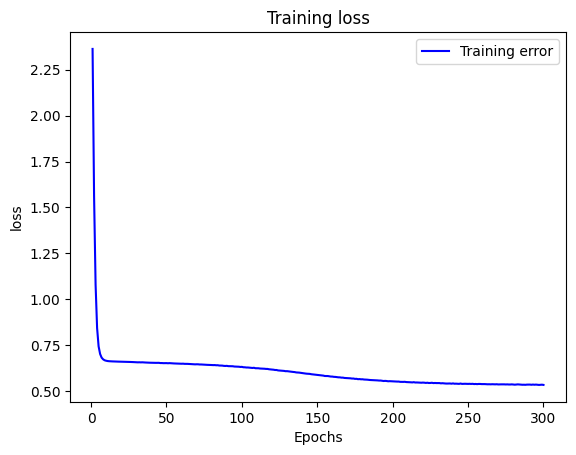

In [ ]:
loss = history.history['loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training error')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

Revisemos en el conjunto de test la medida del error.

In [ ]:
predictions= model.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [ ]:
predictions.shape

(200, 1)

In [ ]:
y_test.shape

(200,)

In [ ]:
df_y=pd.DataFrame(np.concatenate((predictions, y_test.reshape(-1,1)),axis=1), columns=['predictions','true'])

In [ ]:
df_y

,predictions,true
0,0.614816,0.0
1,0.945741,1.0
2,0.277690,0.0
3,0.966483,1.0
4,0.352117,0.0
...,...,...
195,0.974543,1.0
196,0.478214,0.0
197,0.615002,0.0
198,0.252688,0.0


In [ ]:
df_y['predict_bin']=(df_y['predictions']>0.5).astype(int)

In [ ]:
df_y

,predictions,true,predict_bin
0,0.614816,0.0,1
1,0.945741,1.0,1
2,0.277690,0.0,0
3,0.966483,1.0,1
4,0.352117,0.0,0
...,...,...,...
195,0.974543,1.0,1
196,0.478214,0.0,0
197,0.615002,0.0,1
198,0.252688,0.0,0


In [ ]:
pd.value_counts(df_y['true'])

1.0    108
0.0     92
Name: true, dtype: int64

In [ ]:
confusion_matrix(df_y['true'].astype(int),df_y['predict_bin'])

array([[70, 22],
       [26, 82]])

2253/2253 [==============================] - 3s 1ms/step


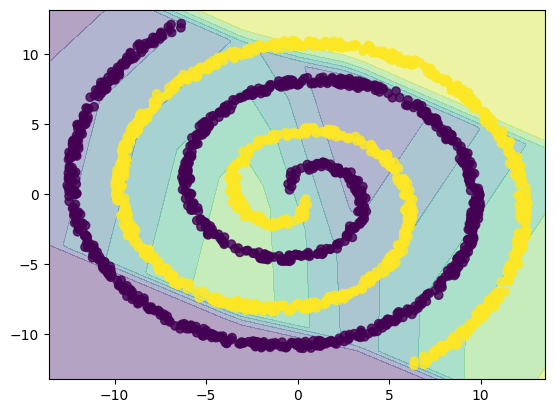

In [ ]:
# Código tomado de https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Utilities/ML-Python-utils.py

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
# Meshgrid creation
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh using the model.
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

# Predictions to obtain the classification results
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plotting
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

### Callbacks

Desafortunadamente, la anterior gráfica no nos dice mucho acerca del performance del modelo en los datos de test y nos plantea las siguientes preguntas: ¿Cuántas épocas debemos utilizar?, ¿Será que con menos épocas se logra un mejor resultado, o faltan épocas?. Al utilizar métodos de momento y mini-batches para entrenar se puede obsevar que el error de entrenamiento aunque disminuye en el tiempo puede aumentar en una iteración. Y si estoy "de malas" y justo en el número de épocas suministrada el error sube, ¿estoy obteniendo el mejor modelo?

El conjunto de validación (val_df) se utiliza con el fin de poder seguir más de cerca el proceso de aprendizaje época a época y dar solución a este tipo de inquietudes. La idea es revisar al final de la época el performance del modelo con datos que la red no esta utilizando para disminuir la pérdida, con el fin de diagnosticar de mejor manera si estamos en un escenario de alta varianza o alto sesgo.  Este conjunto se puede configurar de 2 formas diferentes, utilizando los siguientes parámetros:



*   validation_split: Porcentaje de datos del conjunto de entrenamiento que se separa del conjunto de entrenamiento para validar métricas de error.
*   validation_data: Directamente el conjunto de datos si se separó con anterioridad.



In [ ]:
# Construyamos de nuevo el modelo para revisar cómo progresa el entrenamiento en validación

model=keras.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(len(X_train[1]),)))
model.add(layers.Dense(1, activation='sigmoid'))
# También vamos a cambiar la tasa de aprendizaje del optimizador, para eso utilizo Adam con un lr diferentes
model.compile(optimizer=Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=[keras.metrics.Accuracy()])
history = model.fit(x=X_train,y=y_train, epochs=300, batch_size=32, validation_data=(X_val, y_val))



Epoch 1/300
50/50 [==============================] - 1s 7ms/step - loss: 0.8053 - accuracy: 0.0000e+00 - val_loss: 0.6732 - val_accuracy: 0.0000e+00
Epoch 2/300
50/50 [==============================] - 0s 3ms/step - loss: 0.6797 - accuracy: 0.0000e+00 - val_loss: 0.6900 - val_accuracy: 0.0000e+00
Epoch 3/300
50/50 [==============================] - 0s 3ms/step - loss: 0.6757 - accuracy: 0.0000e+00 - val_loss: 0.6960 - val_accuracy: 0.0000e+00
Epoch 4/300
50/50 [==============================] - 0s 3ms/step - loss: 0.6698 - accuracy: 0.0000e+00 - val_loss: 0.6870 - val_accuracy: 0.0000e+00
Epoch 5/300
50/50 [==============================] - 0s 3ms/step - loss: 0.6697 - accuracy: 0.0000e+00 - val_loss: 0.6950 - val_accuracy: 0.0000e+00
Epoch 6/300
50/50 [==============================] - 0s 3ms/step - loss: 0.6689 - accuracy: 0.0000e+00 - val_loss: 0.6710 - val_accuracy: 0.0000e+00
Epoch 7/300
50/50 [==============================] - 0s 3ms/step - loss: 0.6688 - accuracy: 0.0000e+00 - v

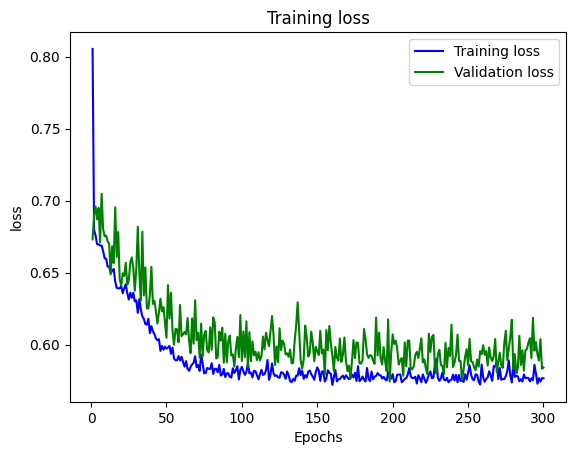

In [ ]:
loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

In [ ]:
predictions= model.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [ ]:
predictions.shape

(200, 1)

In [ ]:
y_test.shape

(200,)

In [ ]:
df_y=pd.DataFrame(np.concatenate((predictions, y_test.reshape(-1,1)),axis=1), columns=['predictions','true'])

In [ ]:
df_y

,predictions,true
0,0.605085,0.0
1,0.994385,1.0
2,0.118765,0.0
3,0.998236,1.0
4,0.420440,0.0
...,...,...
195,0.999882,1.0
196,0.457332,0.0
197,0.597814,0.0
198,0.293336,0.0


In [ ]:
df_y['predict_bin']=(df_y['predictions']>0.5).astype(int)

In [ ]:
df_y

,predictions,true,predict_bin
0,0.605085,0.0,1
1,0.994385,1.0,1
2,0.118765,0.0,0
3,0.998236,1.0,1
4,0.420440,0.0,0
...,...,...,...
195,0.999882,1.0,1
196,0.457332,0.0,0
197,0.597814,0.0,1
198,0.293336,0.0,0


In [ ]:
pd.value_counts(df_y['true'])

1.0    108
0.0     92
Name: true, dtype: int64

In [ ]:
confusion_matrix(df_y['true'].astype(int),df_y['predict_bin'])

array([[68, 24],
       [46, 62]])

La idea de manejar el proceso de aprendizaje es identificar la arquitectura (número de capas, número de neuronas por capa, y función de activación) adecuada para resolver el problema. Podemos probar varias configuraciones y escoger la que minimice el error de validación.

Antes de hacer esto, es importante aclarar que existen otros hiperparámetros importantes que afectan el error de la red y el proceso de aprendizaje:

* Tamaño del mini-batch  
* Tasa de aprendizaje del algoritmo de optimización
* Parámetros propios del algoritmo de optimización, por ejemplo en Adam el $\beta_1$ y $\beta_2$ que controlan la memoria de la velocidad y momento del algoritmo
* Regularización

Antes de cambiar estos hiperparámetros, estudiemos otras herramientas de Keras que nos permiten manejar de manera más adecuada el proceso de entrenamiento.

Los [callbacks](https://keras.io/api/callbacks/) son funciones que se ejecutan siempre al inicio o final de una época, y al final del proceso de entrenamiento. En el link anterior puede encontrar el modo de uso de estas funciones. Particularmente son importantes los siguientes callbacks:



*   [EarlyStopping](https://keras.io/api/callbacks/early_stopping/)
  El callback de EarlyStopping nos permite parar el algoritmo en el momento en el cuál el error de validación deja de mejorar, de tal forma que no tenemos que esperar todas las épocas ejecutadas inicialmente.

*   [ModelCheckpoint](https://keras.io/api/callbacks/model_checkpoint/)
  El callback de ModelCheckpoint nos permite guardar el mejor modelo visto época a época, de esta forma no nos quedamos con el modelo en el estado de la última época siempre.

Revisemos el uso de estos Callbacks, con el siguiente ejemplo

In [ ]:
# Probemos un modelo con 2 capas de 4 unidades neuronales.

# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint ( se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint= ModelCheckpoint(filepath='/tmp/checkpoints',monitor='val_loss', mode='min',save_best_only=True)


model=keras.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(len(X[1]),)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=[keras.metrics.Accuracy()])
# La función fit recibe los callbacks declarados
history = model.fit(x=X_train,y=y_train, epochs=300, batch_size=32, validation_data=(X_val, y_val),callbacks=[callback_early, callback_checkpoint])

Epoch 1/300
50/50 [==============================] - 2s 18ms/step - loss: 1.1489 - accuracy: 0.0000e+00 - val_loss: 0.7015 - val_accuracy: 0.0000e+00
Epoch 2/300
50/50 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.0000e+00 - val_loss: 0.7214 - val_accuracy: 0.0000e+00
Epoch 3/300
50/50 [==============================] - 0s 3ms/step - loss: 0.6993 - accuracy: 0.0000e+00 - val_loss: 0.7197 - val_accuracy: 0.0000e+00
Epoch 4/300
50/50 [==============================] - 1s 14ms/step - loss: 0.6817 - accuracy: 0.0000e+00 - val_loss: 0.6748 - val_accuracy: 0.0000e+00
Epoch 5/300
50/50 [==============================] - 0s 3ms/step - loss: 0.6743 - accuracy: 0.0000e+00 - val_loss: 0.7069 - val_accuracy: 0.0000e+00
Epoch 6/300
50/50 [==============================] - 0s 3ms/step - loss: 0.6669 - accuracy: 0.0000e+00 - val_loss: 0.6749 - val_accuracy: 0.0000e+00
Epoch 7/300
50/50 [==============================] - 0s 3ms/step - loss: 0.6703 - accuracy: 0.0000e+00 -

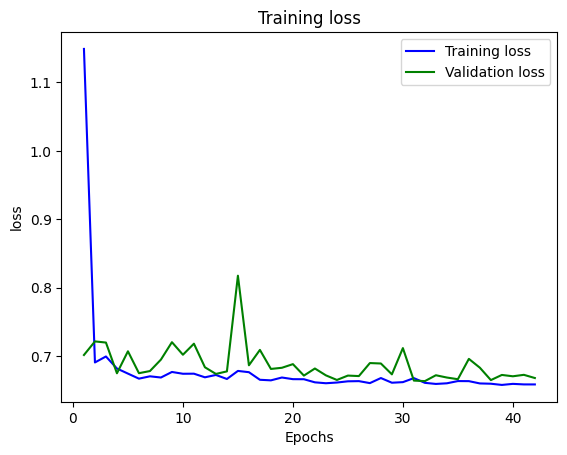

In [ ]:
loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

In [ ]:
# No olvidar recargar  modelo los mejores pesos encontrados
model.load_weights('/tmp/checkpoints')

In [ ]:
predictions= model.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [ ]:
predictions.shape

(200, 1)

In [ ]:
y_test.shape

(200,)

In [ ]:
df_y=pd.DataFrame(np.concatenate((predictions, y_test.reshape(-1,1)),axis=1), columns=['predictions','true'])

In [ ]:
df_y

,predictions,true
0,0.465584,0.0
1,0.557689,1.0
2,0.374913,0.0
3,0.557689,1.0
4,0.557689,0.0
...,...,...
195,0.557689,1.0
196,0.519399,0.0
197,0.477292,0.0
198,0.557689,0.0


In [ ]:
df_y['predict_bin']=(df_y['predictions']>0.5).astype(int)

In [ ]:
df_y

,predictions,true,predict_bin
0,0.465584,0.0,0
1,0.557689,1.0,1
2,0.374913,0.0,0
3,0.557689,1.0,1
4,0.557689,0.0,1
...,...,...,...
195,0.557689,1.0,1
196,0.519399,0.0,1
197,0.477292,0.0,0
198,0.557689,0.0,1


In [ ]:
pd.value_counts(df_y['true'])

1.0    108
0.0     92
Name: true, dtype: int64

In [ ]:
confusion_matrix(df_y['true'].astype(int),df_y['predict_bin'])

array([[50, 42],
       [32, 76]])

## Punto 1 (20%)

Esta red aún no presenta un buen comportamiento en el conjunto de datos. Explore los hiperparámetros de la red para realizar una clasificación adecuada, mida el performance utilizando métricas de clasificación. Justifique los pasos que lo llevaron a escoger el modelo utilizando las curvas del proceso de aprendizaje. Grafique las fronteras de decisión encontradas.

In [ ]:
# Probemos un modelo con 2 capas de 4 unidades neuronales.

# Declaración callback de EarlyStopping (si pasan más de 20 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=20)
# Declaración callback checkpoint ( se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint= ModelCheckpoint(filepath='/tmp/checkpoints',monitor='val_loss', mode='min',save_best_only=True)


model=keras.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(len(X[1]),)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=[keras.metrics.Accuracy()])
# La función fit recibe los callbacks declarados
history = model.fit(x=X_train,y=y_train, epochs=300, batch_size=32, validation_data=(X_val, y_val),callbacks=[callback_early, callback_checkpoint])

Epoch 1/300
50/50 [==============================] - 5s 37ms/step - loss: 0.6776 - accuracy: 0.0000e+00 - val_loss: 0.6722 - val_accuracy: 0.0000e+00
Epoch 2/300
50/50 [==============================] - 1s 26ms/step - loss: 0.6709 - accuracy: 0.0000e+00 - val_loss: 0.6619 - val_accuracy: 0.0000e+00
Epoch 3/300
50/50 [==============================] - 1s 27ms/step - loss: 0.6671 - accuracy: 0.0000e+00 - val_loss: 0.6555 - val_accuracy: 0.0000e+00
Epoch 4/300
50/50 [==============================] - 1s 28ms/step - loss: 0.6666 - accuracy: 0.0000e+00 - val_loss: 0.6497 - val_accuracy: 0.0000e+00
Epoch 5/300
50/50 [==============================] - 0s 3ms/step - loss: 0.6631 - accuracy: 0.0000e+00 - val_loss: 0.6507 - val_accuracy: 0.0000e+00
Epoch 6/300
50/50 [==============================] - 0s 5ms/step - loss: 0.6640 - accuracy: 0.0000e+00 - val_loss: 0.6511 - val_accuracy: 0.0000e+00
Epoch 7/300
50/50 [==============================] - 2s 41ms/step - loss: 0.6636 - accuracy: 0.0000e+0

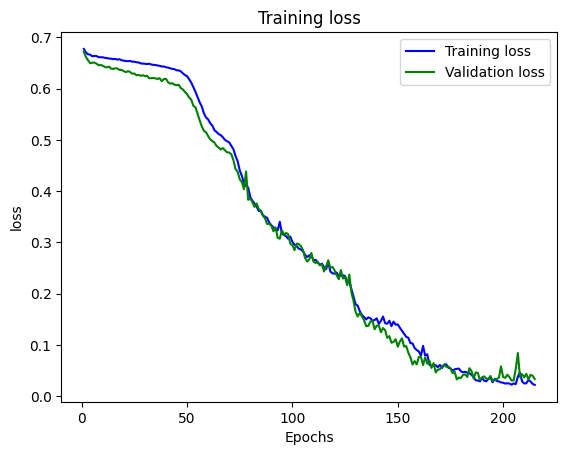

In [ ]:
loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

In [ ]:
predictions= model.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [ ]:
df_y=pd.DataFrame(np.concatenate((predictions, y_test.reshape(-1,1)),axis=1), columns=['predictions','true'])

In [ ]:
df_y

,predictions,true
0,0.520155,0.0
1,0.999292,1.0
2,0.000006,0.0
3,0.993301,1.0
4,0.000343,0.0
...,...,...
195,0.999745,1.0
196,0.001358,0.0
197,0.000028,0.0
198,0.025172,0.0


In [ ]:
df_y['predict_bin']=(df_y['predictions']>0.5).astype(int)

In [ ]:
pd.value_counts(df_y['true'])

1.0    108
0.0     92
Name: true, dtype: int64

In [ ]:
confusion_matrix(df_y['true'].astype(int),df_y['predict_bin'])

array([[ 91,   1],
       [  1, 107]])

2244/2244 [==============================] - 3s 2ms/step


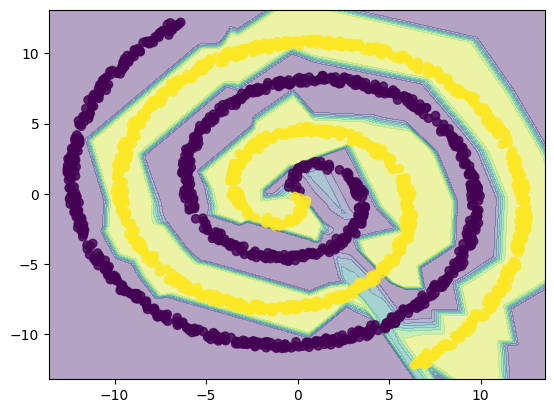

In [ ]:
#FRONTERAS DE DECISIÓN

# Código tomado de https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Utilities/ML-Python-utils.py

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
# Meshgrid creation
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh using the model.
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

# Predictions to obtain the classification results
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plotting
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

In [ ]:
#Métricas de performance

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predicciones en el conjunto de validación
y_pred = model.predict(X_val)

# Convierte las predicciones a etiquetas binarias (0 o 1) según un umbral de 0.5
y_pred_binary = (y_pred > 0.5).astype(int)

# Calcula las métricas
accuracy = accuracy_score(y_val, y_pred_binary)
precision = precision_score(y_val, y_pred_binary)
recall = recall_score(y_val, y_pred_binary)
f1 = f1_score(y_val, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


7/7 [==============================] - 0s 3ms/step
Accuracy: 0.98
Precision: 0.989010989010989
Recall: 0.967741935483871
F1 Score: 0.9782608695652174


## Punto 2 (80%)

Descargue del archivo disponible en Brightspace. Los datos son de una tarea de clasificación misteriosa. Se le han suministrado 2 datasets: public_dataset y quiz.

Ud debe en el taller construir un modelo de redes neuronales que prediga la variable label.

Además de su informe y código que usualmente se deben entregar en el taller, debe entregar un archivo Python ejecutable que lea los pesos de la red creada, lea el archivo quiz.csv y cree un archivo llamado answers.txt con la etiqueta predicha para cada elemento del archivo quiz.csv en orden.

Los 2 grupos con mejor desempeño en el dataset quiz, tendrán bono en la nota del taller 2.


In [ ]:
# importar librerias

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from sklearn import pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from google.colab import drive
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
drive.mount('/content/drive')
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


Mounted at /content/drive


In [ ]:
#importar datos
file_id = '1BZ81x-pAyjCXxnfQ0ktEKnjfwxiemavh'
link = f'https://drive.google.com/uc?id={file_id}'
mistery_df = pd.read_csv(link)

NameError: ignored

In [ ]:
mistery_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,label
count,517682.000000,517682.000000,517682.000000,517682.000000,517682.000000,517682.000000,517682.000000,517682.000000,517682.000000,517682.000000,...,517682.000000,517682.000000,517682.000000,517682.000000,517682.000000,517682.000000,517682.000000,517682.000000,517682.000000,517682.000000
mean,0.011376,0.012998,0.015052,0.015996,0.021403,0.021388,0.023731,0.026646,0.030044,0.036582,...,223.324703,212.138174,142.545775,46.407041,155.663966,269.294544,2959.014215,1980.547635,2349.905282,0.004725
std,0.106049,0.113267,0.121759,0.125461,0.144724,0.144673,0.152209,0.161046,0.170707,0.187734,...,19.754795,26.776116,38.271013,58.327113,111.916526,212.378839,280.109423,1324.590848,1559.310449,0.068575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,1859.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,213.000000,198.000000,119.000000,7.000000,58.000000,108.000000,2809.000000,1024.000000,1106.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,226.000000,218.000000,143.000000,30.000000,127.000000,218.000000,2995.000000,1710.000000,1997.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,237.000000,231.000000,168.000000,69.000000,261.000000,384.000000,3163.000000,2550.000000,3327.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,254.000000,254.000000,254.000000,601.000000,360.000000,1397.000000,3858.000000,7173.000000,7117.000000,1.000000


In [ ]:
mistery_df.dtypes

0        int64
1        int64
2        int64
3        int64
4        int64
5        int64
6        int64
7        int64
8        int64
9        int64
10       int64
11       int64
12       int64
13       int64
14       int64
15       int64
16       int64
17       int64
18       int64
19       int64
20       int64
21       int64
22       int64
23       int64
24       int64
25       int64
26       int64
27       int64
28       int64
29       int64
30       int64
31       int64
32       int64
label    int64
dtype: object

In [ ]:

mistery_df.loc[:,'label'].value_counts()


0    515236
1      2446
Name: label, dtype: int64

In [ ]:
#importar datos de quiz
file_id = '16rxCyS-T-0ACDyrebuBORLhxQUGfcEFP'
link = f'https://drive.google.com/uc?id={file_id}'
quiz_df = pd.read_csv(link)

In [ ]:
quiz_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
count,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,...,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000,58101.000000
mean,0.010826,0.012736,0.015026,0.015249,0.020912,0.021118,0.023838,0.027796,0.029913,0.036884,...,14.135385,223.260254,212.212957,142.361698,46.590644,155.507943,270.805528,2961.615841,1978.919451,2350.529251
std,0.103484,0.112136,0.121655,0.122544,0.143091,0.143780,0.152545,0.164391,0.170350,0.188479,...,7.511713,19.898346,26.749265,38.297732,58.096625,111.800193,214.061609,278.889308,1322.040956,1559.692115
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,52.000000,0.000000,-161.000000,0.000000,0.000000,1872.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.000000,213.000000,198.000000,119.000000,7.000000,58.000000,108.000000,2813.000000,1025.000000,1106.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,13.000000,226.000000,218.000000,143.000000,30.000000,127.000000,228.000000,2997.000000,1710.000000,1991.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.000000,237.000000,231.000000,168.000000,69.000000,259.000000,390.000000,3165.000000,2548.000000,3334.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,62.000000,254.000000,254.000000,254.000000,592.000000,360.000000,1383.000000,3851.000000,7112.000000,7041.000000


### Crear X y Y con los datos de mistery_df
#### usar stratify para garantizar proporicion de la columna label en la separación



In [ ]:
X = mistery_df.drop("label", axis=1).values
Y=mistery_df[['label']].values
#separar train y val, 20%
x_train, x_val_test, y_train, y_val_test = train_test_split(X,Y, test_size=0.20, random_state=123,stratify=Y)
#separar el 20% en 50% c/u para val y test
x_val,x_test, y_val,y_test = train_test_split(x_val_test, y_val_test, test_size=0.5, random_state=42,stratify=y_val_test)

### Construir nuevo modelo

In [ ]:
# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint ( se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint= ModelCheckpoint(filepath='/tmp/checkpoints',monitor='val_loss', mode='min',save_best_only=True)


modelmistery=keras.Sequential()
modelmistery.add(layers.Dense(4, activation='relu', input_shape=(len(x_train[1]),)))
modelmistery.add(layers.Dense(4, activation='relu'))
modelmistery.add(layers.Dense(1, activation='sigmoid'))
modelmistery.compile(optimizer=Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=[keras.metrics.Accuracy()])
# La función fit recibe los callbacks declarados
history = modelmistery.fit(x=x_train,y=y_train, epochs=300, batch_size=32, validation_data=(x_val, y_val),callbacks=[callback_early, callback_checkpoint])

KeyboardInterrupt: ignored

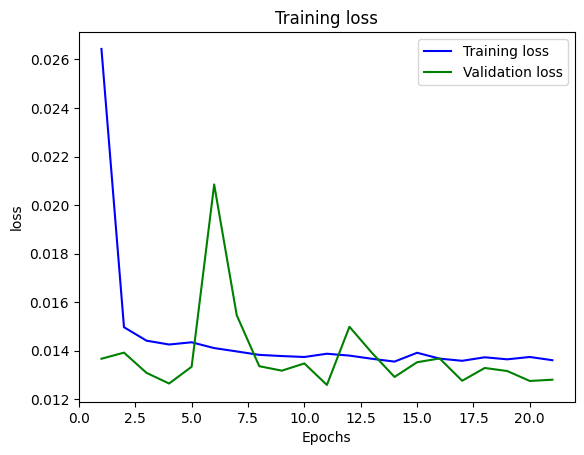

In [ ]:
loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

1618/1618 [==============================] - 2s 1ms/step


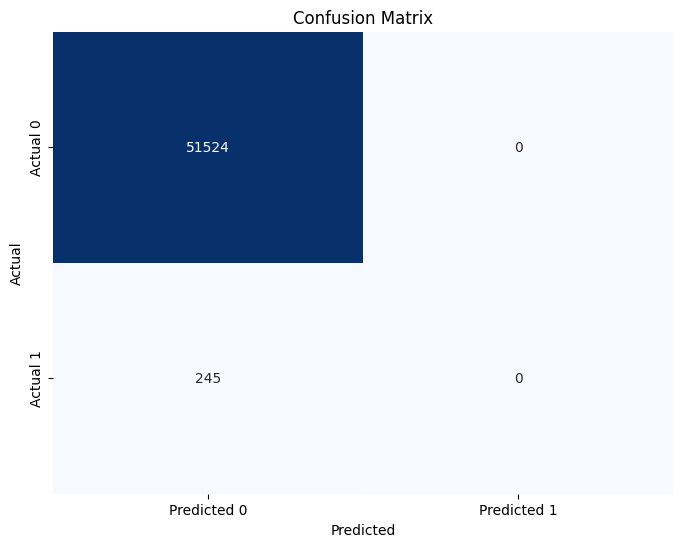

In [ ]:
modelmistery.load_weights('/tmp/checkpoints')
predictions= modelmistery.predict(x_test)
df_y=pd.DataFrame(np.concatenate((predictions, y_test.reshape(-1,1)),axis=1), columns=['predictions','true'])
df_y['predict_bin']=(df_y['predictions']>0.5).astype(int)



confusion = confusion_matrix(df_y['true'].astype(int), df_y['predict_bin'])

# Crear a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
y_pred = df_y['predict_bin']
y_true = df_y['true'].astype(int)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.9952674380420715
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Dado que el ratio de 1 es muy bajo (0.0047 1's por cada 0) y al modelo inicial le esta dando igual  no predecir 1, la mejor estrategia es hacer un oversampling en el entrenamiento para que el modelo mejore su aproximación.

### Crear Oversampling al 5%

In [ ]:
# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint ( se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint= ModelCheckpoint(filepath='/tmp/checkpoints',monitor='val_loss', mode='min',save_best_only=True)

desired_ratio = 0.05
total_samples = len(y_train)

num_desired_ones = int(total_samples * desired_ratio)
num_existing_ones = np.sum(y_train == 1)
num_synthetic_ones = num_desired_ones - num_existing_ones
smote = SMOTE(sampling_strategy={1: num_synthetic_ones}, random_state=123)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


modelmistery=keras.Sequential()
modelmistery.add(layers.Dense(4, activation='relu', input_shape=(len(x_train_resampled[1]),)))
modelmistery.add(layers.Dense(4, activation='relu'))
modelmistery.add(layers.Dense(1, activation='sigmoid'))
modelmistery.compile(optimizer=Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=[keras.metrics.Accuracy()])
# La función fit recibe los callbacks declarados
history = modelmistery.fit(x=x_train_resampled,y= y_train_resampled, epochs=300, batch_size=32, validation_data=(x_val, y_val),callbacks=[callback_early, callback_checkpoint])

Epoch 1/300
13467/13467 [==============================] - 20s 1ms/step - loss: 0.1681 - accuracy: 4.5946e-04 - val_loss: 0.0133 - val_accuracy: 0.0000e+00
Epoch 2/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.0432 - accuracy: 0.0000e+00 - val_loss: 0.0305 - val_accuracy: 0.0000e+00
Epoch 3/300
13467/13467 [==============================] - 20s 1ms/step - loss: 0.0401 - accuracy: 0.0000e+00 - val_loss: 0.0240 - val_accuracy: 0.0000e+00
Epoch 4/300
13467/13467 [==============================] - 19s 1ms/step - loss: 0.0440 - accuracy: 2.3205e-06 - val_loss: 0.0231 - val_accuracy: 0.0000e+00
Epoch 5/300
13467/13467 [==============================] - 19s 1ms/step - loss: 0.0433 - accuracy: 0.0000e+00 - val_loss: 0.0302 - val_accuracy: 0.0000e+00
Epoch 6/300
13467/13467 [==============================] - 19s 1ms/step - loss: 0.0433 - accuracy: 2.3205e-06 - val_loss: 0.0217 - val_accuracy: 0.0000e+00
Epoch 7/300
13467/13467 [==============================] - 19s 1

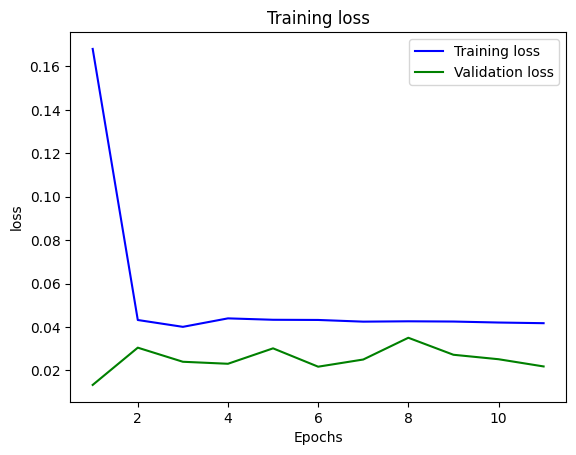

In [ ]:
loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

1618/1618 [==============================] - 2s 1ms/step


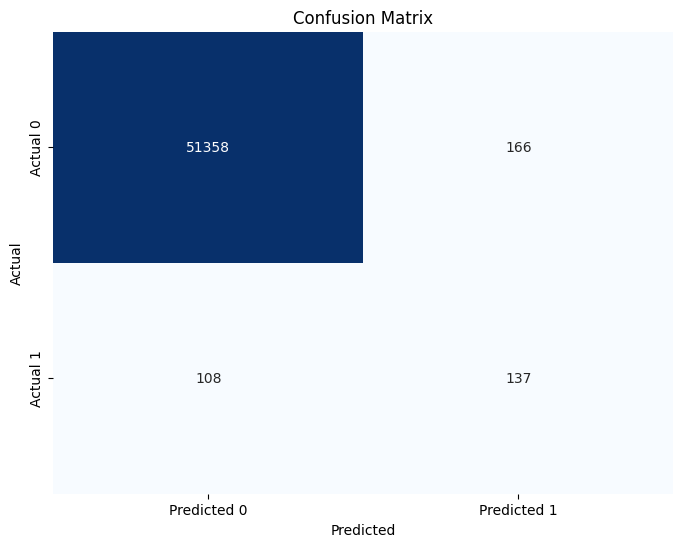

In [ ]:
modelmistery.load_weights('/tmp/checkpoints')
predictions= modelmistery.predict(x_test)
df_y=pd.DataFrame(np.concatenate((predictions, y_test.reshape(-1,1)),axis=1), columns=['predictions','true'])
df_y['predict_bin']=(df_y['predictions']>0.5).astype(int)



confusion = confusion_matrix(df_y['true'].astype(int), df_y['predict_bin'])

# Crear a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
y_pred = df_y['predict_bin']
y_true = df_y['true'].astype(int)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.9947072572388881
Precision: 0.4521452145214521
Recall: 0.5591836734693878
F1-Score: 0.5


#### Dado que fue un buen intento, se prueba el mismo modelo con un mayor oversampling

### Oversampling al 20%

In [ ]:
# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint ( se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint= ModelCheckpoint(filepath='/tmp/checkpoints',monitor='val_loss', mode='min',save_best_only=True)

desired_ratio = 0.20
total_samples = len(y_train)

num_desired_ones = int(total_samples * desired_ratio)
num_existing_ones = np.sum(y_train == 1)
num_synthetic_ones = num_desired_ones - num_existing_ones
smote = SMOTE(sampling_strategy={1: num_synthetic_ones}, random_state=123)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


modelmistery=keras.Sequential()
modelmistery.add(layers.Dense(4, activation='relu', input_shape=(len(x_train_resampled[1]),)))
modelmistery.add(layers.Dense(4, activation='relu'))
modelmistery.add(layers.Dense(1, activation='sigmoid'))
modelmistery.compile(optimizer=Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=[keras.metrics.Accuracy()])
# La función fit recibe los callbacks declarados
history = modelmistery.fit(x=x_train_resampled,y= y_train_resampled, epochs=300, batch_size=32, validation_data=(x_val, y_val),callbacks=[callback_early, callback_checkpoint])

Epoch 1/300
15401/15409 [============================>.] - ETA: 0s - loss: 0.1102 - accuracy: 0.0777

15409/15409 [==============================] - 24s 2ms/step - loss: 0.1101 - accuracy: 0.0777 - val_loss: 0.0849 - val_accuracy: 0.1354
Epoch 2/300
15409/15409 [==============================] - 22s 1ms/step - loss: 0.0687 - accuracy: 0.1816 - val_loss: 0.0864 - val_accuracy: 0.2187
Epoch 3/300
15409/15409 [==============================] - 22s 1ms/step - loss: 0.0661 - accuracy: 0.2296 - val_loss: 0.0389 - val_accuracy: 0.4022
Epoch 4/300
15409/15409 [==============================] - 23s 1ms/step - loss: 0.0653 - accuracy: 0.2640 - val_loss: 0.0432 - val_accuracy: 0.4093
Epoch 5/300
15409/15409 [==============================] - 22s 1ms/step - loss: 0.0648 - accuracy: 0.2724 - val_loss: 0.0562 - val_accuracy: 0.2447
Epoch 6/300
15409/15409 [==============================] - 22s 1ms/step - loss: 0.0642 - accuracy: 0.2532 - val_loss: 0.0355 - val_accuracy: 0.2831
Epoch 7/300
15409/15409 [==============================] - 23s 1ms/step - loss: 0.0637 - accuracy: 0.2408 - val_loss: 0.0483

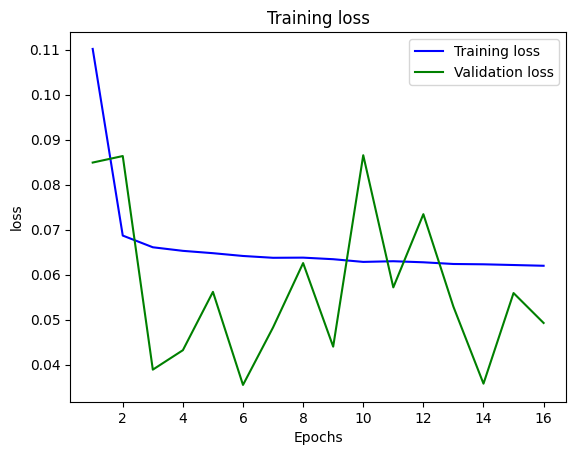

1618/1618 [==============================] - 2s 982us/step


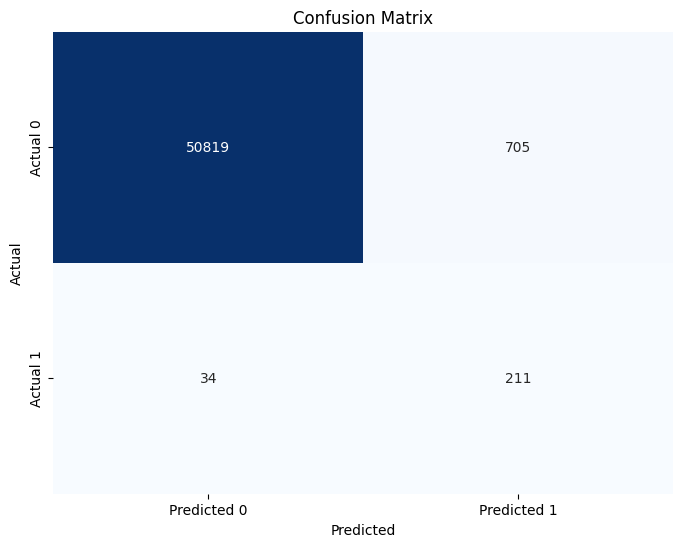

In [ ]:

loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()


modelmistery.load_weights('/tmp/checkpoints')
predictions= modelmistery.predict(x_test)
df_y=pd.DataFrame(np.concatenate((predictions, y_test.reshape(-1,1)),axis=1), columns=['predictions','true'])
df_y['predict_bin']=(df_y['predictions']>0.5).astype(int)


confusion = confusion_matrix(df_y['true'].astype(int), df_y['predict_bin'])

# crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
y_pred = df_y['predict_bin']
y_true = df_y['true'].astype(int)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.9857250478085341
Precision: 0.23034934497816595
Recall: 0.8612244897959184
F1-Score: 0.363479758828596


#### se observa un overfitting y desbalanceo, el modelo se comporta mejor solo con un 5% de oversampling, apartir de aca se haran ajustes a otros hiperparámetros

### Incremento neuronas 4,8,16 y una capa adicional

In [ ]:
# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint ( se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint= ModelCheckpoint(filepath='/tmp/checkpoints',monitor='val_loss', mode='min',save_best_only=True)

desired_ratio = 0.05
total_samples = len(y_train)

num_desired_ones = int(total_samples * desired_ratio)
num_existing_ones = np.sum(y_train == 1)
num_synthetic_ones = num_desired_ones - num_existing_ones
smote = SMOTE(sampling_strategy={1: num_synthetic_ones}, random_state=123)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


modelmistery=keras.Sequential()
modelmistery.add(layers.Dense(4, activation='relu', input_shape=(len(x_train_resampled[1]),)))
modelmistery.add(layers.Dense(8, activation='relu'))
modelmistery.add(layers.Dense(16, activation='relu'))
modelmistery.add(layers.Dense(1, activation='sigmoid'))
modelmistery.compile(optimizer=Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=[keras.metrics.Accuracy()])
# La función fit recibe los callbacks declarados
history = modelmistery.fit(x=x_train_resampled,y= y_train_resampled, epochs=300, batch_size=32, validation_data=(x_val, y_val),callbacks=[callback_early, callback_checkpoint])

Epoch 1/300
13467/13467 [==============================] - 21s 1ms/step - loss: 0.1455 - accuracy: 0.0063 - val_loss: 0.0380 - val_accuracy: 0.0000e+00
Epoch 2/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.1160 - accuracy: 8.3539e-05 - val_loss: 0.0551 - val_accuracy: 0.0000e+00
Epoch 3/300
13467/13467 [==============================] - 20s 1ms/step - loss: 0.1792 - accuracy: 0.0000e+00 - val_loss: 0.0617 - val_accuracy: 0.0000e+00
Epoch 4/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.1790 - accuracy: 0.0000e+00 - val_loss: 0.0585 - val_accuracy: 0.0000e+00
Epoch 5/300
13467/13467 [==============================] - 20s 2ms/step - loss: 0.1790 - accuracy: 0.0000e+00 - val_loss: 0.0633 - val_accuracy: 0.0000e+00
Epoch 6/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.1790 - accuracy: 0.0000e+00 - val_loss: 0.0571 - val_accuracy: 0.0000e+00
Epoch 7/300
13467/13467 [==============================] - 21s 2ms/s

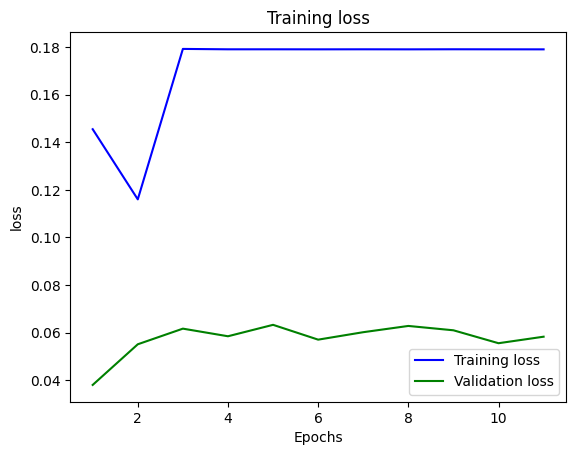

1618/1618 [==============================] - 2s 1ms/step


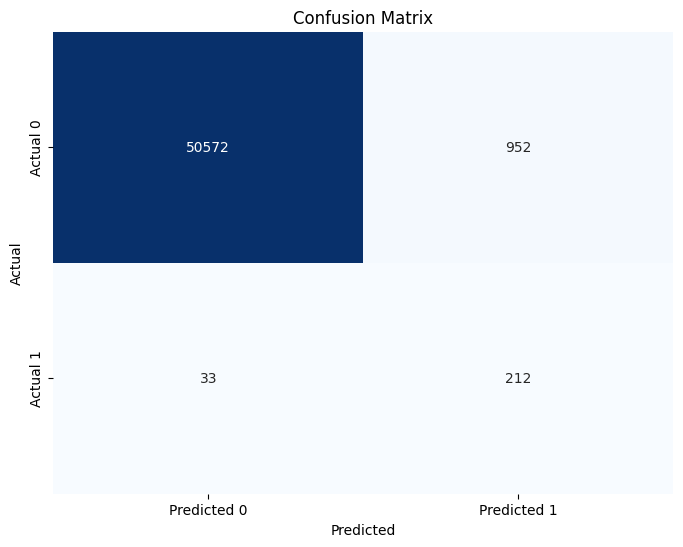

In [ ]:

loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()


modelmistery.load_weights('/tmp/checkpoints')
predictions= modelmistery.predict(x_test)
df_y=pd.DataFrame(np.concatenate((predictions, y_test.reshape(-1,1)),axis=1), columns=['predictions','true'])
df_y['predict_bin']=(df_y['predictions']>0.5).astype(int)


confusion = confusion_matrix(df_y['true'].astype(int), df_y['predict_bin'])

# crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
y_pred = df_y['predict_bin']
y_true = df_y['true'].astype(int)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.9809731692711855
Precision: 0.18213058419243985
Recall: 0.8653061224489796
F1-Score: 0.3009226401703336


#### Inestable

In [ ]:
print(x_train.shape,x_train_resampled.shape,y_train.shape,y_train_resampled.shape)
num_zeros = np.sum(y_train_resampled == 0)
num_ones = np.sum(y_train_resampled == 1)

print(f"Number of 0s: {num_zeros}")
print(f"Number of 1s: {num_ones}")

(414145, 33) (430938, 33) (414145, 1) (430938,)
Number of 0s: 412188
Number of 1s: 18750


### Incrementar neuronas

In [ ]:
# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint ( se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint= ModelCheckpoint(filepath='/tmp/checkpoints',monitor='val_loss', mode='min',save_best_only=True)

desired_ratio = 0.05
total_samples = len(y_train)

num_desired_ones = int(total_samples * desired_ratio)
num_existing_ones = np.sum(y_train == 1)
num_synthetic_ones = num_desired_ones - num_existing_ones
smote = SMOTE(sampling_strategy={1: num_synthetic_ones}, random_state=123)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


modelmistery=keras.Sequential()
modelmistery.add(layers.Dense(8, activation='relu', input_shape=(len(x_train_resampled[1]),)))
modelmistery.add(layers.Dense(16, activation='relu'))
modelmistery.add(layers.Dense(32, activation='relu'))
modelmistery.add(layers.Dense(1, activation='sigmoid'))
modelmistery.compile(optimizer=Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=[keras.metrics.Accuracy()])
# La función fit recibe los callbacks declarados
history = modelmistery.fit(x=x_train_resampled,y= y_train_resampled, epochs=300, batch_size=32, validation_data=(x_val, y_val),callbacks=[callback_early, callback_checkpoint])

Epoch 1/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.1796 - accuracy: 0.0150 - val_loss: 0.0569 - val_accuracy: 0.0000e+00
Epoch 2/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.1794 - accuracy: 0.0000e+00 - val_loss: 0.0638 - val_accuracy: 0.0000e+00
Epoch 3/300
13467/13467 [==============================] - 20s 1ms/step - loss: 0.1791 - accuracy: 0.0000e+00 - val_loss: 0.0578 - val_accuracy: 0.0000e+00
Epoch 4/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.1790 - accuracy: 0.0000e+00 - val_loss: 0.0596 - val_accuracy: 0.0000e+00
Epoch 5/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.1790 - accuracy: 0.0000e+00 - val_loss: 0.0617 - val_accuracy: 0.0000e+00
Epoch 6/300
13467/13467 [==============================] - 20s 2ms/step - loss: 0.1790 - accuracy: 0.0000e+00 - val_loss: 0.0578 - val_accuracy: 0.0000e+00
Epoch 7/300
13467/13467 [==============================] - 20s 1ms/s

13467/13467 [==============================] - 22s 2ms/step - loss: 0.1790 - accuracy: 0.0000e+00 - val_loss: 0.0628 - val_accuracy: 0.0000e+00
Epoch 11/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.1790 - accuracy: 0.0000e+00 - val_loss: 0.0573 - val_accuracy: 0.0000e+00
Epoch 12/300
13467/13467 [==============================] - 20s 1ms/step - loss: 0.1790 - accuracy: 0.0000e+00 - val_loss: 0.0593 - val_accuracy: 0.0000e+00
Epoch 13/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.1790 - accuracy: 0.0000e+00 - val_loss: 0.0619 - val_accuracy: 0.0000e+00
Epoch 14/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.1790 - accuracy: 0.0000e+00 - val_loss: 0.0614 - val_accuracy: 0.0000e+00
Epoch 15/300
13467/13467 [==============================] - 20s 2ms/step - loss: 0.1790 - accuracy: 0.0000e+00 - val_loss: 0.0642 - val_accuracy: 0.0000e+00
Epoch 16/300
13467/13467 [==============================] - 21s 2ms/ste

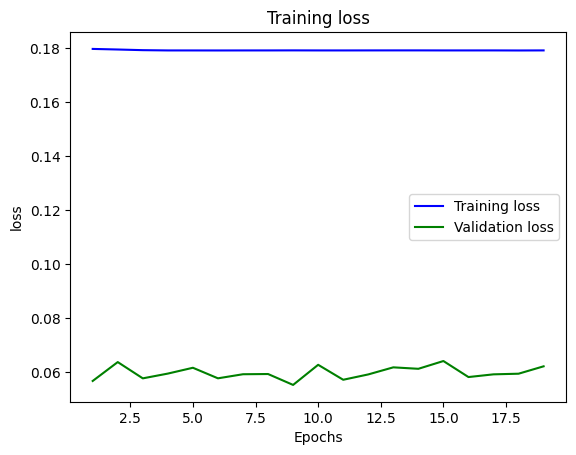

1618/1618 [==============================] - 1s 895us/step


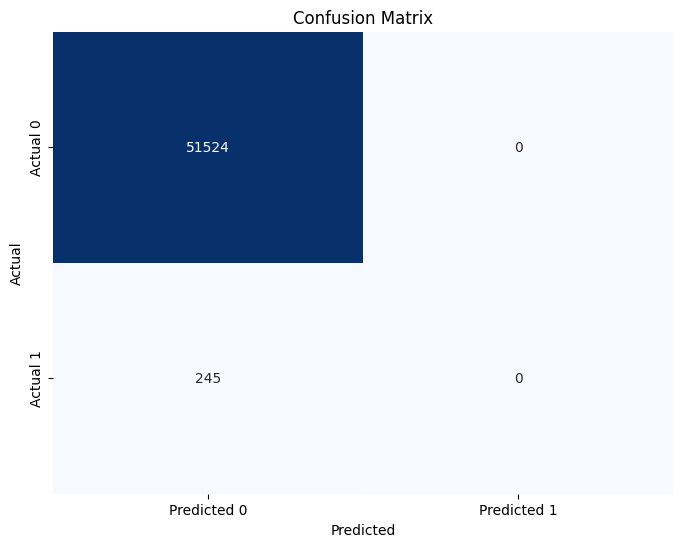

In [ ]:
loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()


modelmistery.load_weights('/tmp/checkpoints')
predictions= modelmistery.predict(x_test)
df_y=pd.DataFrame(np.concatenate((predictions, y_test.reshape(-1,1)),axis=1), columns=['predictions','true'])
df_y['predict_bin']=(df_y['predictions']>0.5).astype(int)


confusion = confusion_matrix(df_y['true'].astype(int), df_y['predict_bin'])

# crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
y_pred = df_y['predict_bin']
y_true = df_y['true'].astype(int)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.9952674380420715
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Se ve una mayor inestabilidad en la validación, por lo que se utilizara una capa más

### Una capa más mismas neuronas.

In [ ]:
# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint ( se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint= ModelCheckpoint(filepath='/tmp/checkpoints',monitor='val_loss', mode='min',save_best_only=True)

desired_ratio = 0.05
total_samples = len(y_train)

num_desired_ones = int(total_samples * desired_ratio)
num_existing_ones = np.sum(y_train == 1)
num_synthetic_ones = num_desired_ones - num_existing_ones
smote = SMOTE(sampling_strategy={1: num_synthetic_ones}, random_state=123)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


modelmistery=keras.Sequential()
modelmistery.add(layers.Dense(8, activation='relu', input_shape=(len(x_train_resampled[1]),)))
modelmistery.add(layers.Dense(16, activation='relu'))
modelmistery.add(layers.Dense(32, activation='relu'))
modelmistery.add(layers.Dense(64, activation='relu'))
modelmistery.add(layers.Dense(1, activation='sigmoid'))
modelmistery.compile(optimizer=Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=[keras.metrics.Accuracy()])
# La función fit recibe los callbacks declarados
history = modelmistery.fit(x=x_train_resampled,y= y_train_resampled, epochs=300, batch_size=32, validation_data=(x_val, y_val),callbacks=[callback_early, callback_checkpoint])

Epoch 1/300
13467/13467 [==============================] - 23s 2ms/step - loss: 0.0772 - accuracy: 0.0117 - val_loss: 0.0147 - val_accuracy: 0.0020
Epoch 2/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.1535 - accuracy: 0.0054 - val_loss: 0.0599 - val_accuracy: 0.0000e+00
Epoch 3/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.1794 - accuracy: 0.0000e+00 - val_loss: 0.0541 - val_accuracy: 0.0000e+00
Epoch 4/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.1793 - accuracy: 0.0000e+00 - val_loss: 0.0568 - val_accuracy: 0.0000e+00
Epoch 5/300
13467/13467 [==============================] - 20s 2ms/step - loss: 0.1793 - accuracy: 0.0000e+00 - val_loss: 0.0549 - val_accuracy: 0.0000e+00
Epoch 6/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.1792 - accuracy: 0.0000e+00 - val_loss: 0.0601 - val_accuracy: 0.0000e+00
Epoch 7/300
13467/13467 [==============================] - 20s 2ms/step - lo

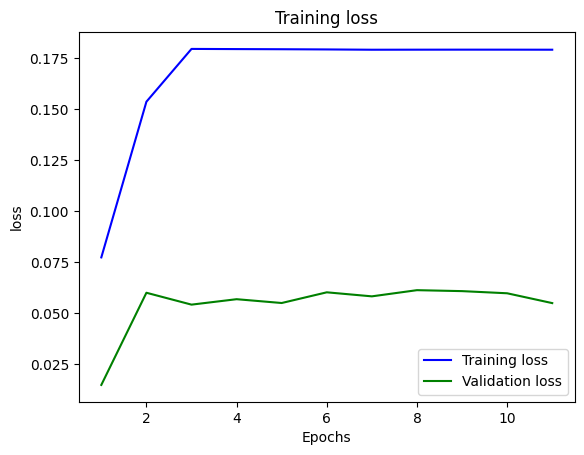

1618/1618 [==============================] - 2s 1ms/step


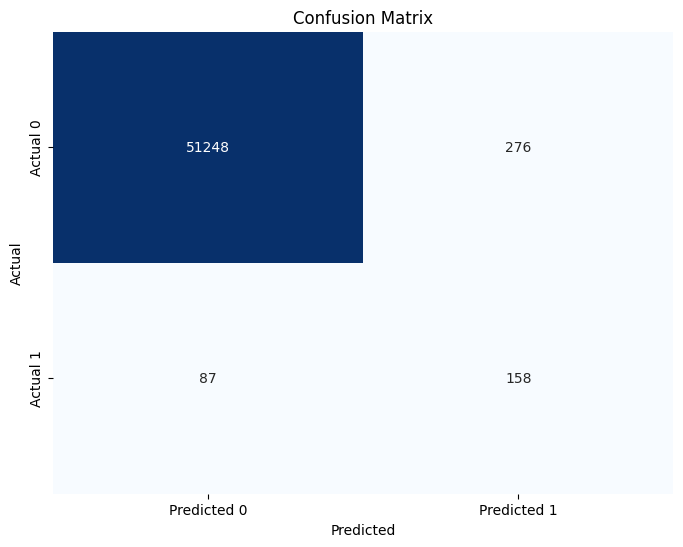

In [ ]:
loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()


modelmistery.load_weights('/tmp/checkpoints')
predictions= modelmistery.predict(x_test)
df_y=pd.DataFrame(np.concatenate((predictions, y_test.reshape(-1,1)),axis=1), columns=['predictions','true'])
df_y['predict_bin']=(df_y['predictions']>0.5).astype(int)


confusion = confusion_matrix(df_y['true'].astype(int), df_y['predict_bin'])

# crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
y_pred = df_y['predict_bin']
y_true = df_y['true'].astype(int)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.9929880816704978
Precision: 0.3640552995391705
Recall: 0.6448979591836734
F1-Score: 0.4653902798232694


#### el modelo vuelve a no predecir nada con más capas, se correra un nuevo modelo con menos neuronas pero con forma trapezoidal.

In [ ]:
# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint ( se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint= ModelCheckpoint(filepath='/tmp/checkpoints',monitor='val_loss', mode='min',save_best_only=True)

desired_ratio = 0.05
total_samples = len(y_train)

num_desired_ones = int(total_samples * desired_ratio)
num_existing_ones = np.sum(y_train == 1)
num_synthetic_ones = num_desired_ones - num_existing_ones
smote = SMOTE(sampling_strategy={1: num_synthetic_ones}, random_state=123)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


modelmistery=keras.Sequential()
modelmistery.add(layers.Dense(4, activation='relu', input_shape=(len(x_train_resampled[1]),)))
modelmistery.add(layers.Dense(8, activation='relu'))
modelmistery.add(layers.Dense(8, activation='relu'))
modelmistery.add(layers.Dense(4, activation='relu'))
modelmistery.add(layers.Dense(1, activation='sigmoid'))
modelmistery.compile(optimizer=Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=[keras.metrics.Accuracy()])
# La función fit recibe los callbacks declarados
history = modelmistery.fit(x=x_train_resampled,y= y_train_resampled, epochs=300, batch_size=32, validation_data=(x_val, y_val),callbacks=[callback_early, callback_checkpoint])

Epoch 1/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.1833 - accuracy: 0.0000e+00 - val_loss: 0.0613 - val_accuracy: 0.0000e+00
Epoch 2/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.1790 - accuracy: 0.0000e+00 - val_loss: 0.0600 - val_accuracy: 0.0000e+00
Epoch 3/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.1790 - accuracy: 0.0000e+00 - val_loss: 0.0572 - val_accuracy: 0.0000e+00
Epoch 4/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.1790 - accuracy: 0.0000e+00 - val_loss: 0.0579 - val_accuracy: 0.0000e+00
Epoch 5/300
13467/13467 [==============================] - 20s 2ms/step - loss: 0.1790 - accuracy: 0.0000e+00 - val_loss: 0.0596 - val_accuracy: 0.0000e+00
Epoch 6/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.1790 - accuracy: 0.0000e+00 - val_loss: 0.0625 - val_accuracy: 0.0000e+00
Epoch 7/300
13467/13467 [==============================] - 20s 1

13467/13467 [==============================] - 22s 2ms/step - loss: 0.1790 - accuracy: 0.0000e+00 - val_loss: 0.0559 - val_accuracy: 0.0000e+00
Epoch 9/300
13467/13467 [==============================] - 20s 1ms/step - loss: 0.1790 - accuracy: 0.0000e+00 - val_loss: 0.0581 - val_accuracy: 0.0000e+00
Epoch 10/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.1790 - accuracy: 0.0000e+00 - val_loss: 0.0573 - val_accuracy: 0.0000e+00
Epoch 11/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.1790 - accuracy: 0.0000e+00 - val_loss: 0.0594 - val_accuracy: 0.0000e+00
Epoch 12/300
13467/13467 [==============================] - 20s 1ms/step - loss: 0.1790 - accuracy: 0.0000e+00 - val_loss: 0.0607 - val_accuracy: 0.0000e+00
Epoch 13/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.1790 - accuracy: 0.0000e+00 - val_loss: 0.0574 - val_accuracy: 0.0000e+00
Epoch 14/300
13467/13467 [==============================] - 21s 2ms/step

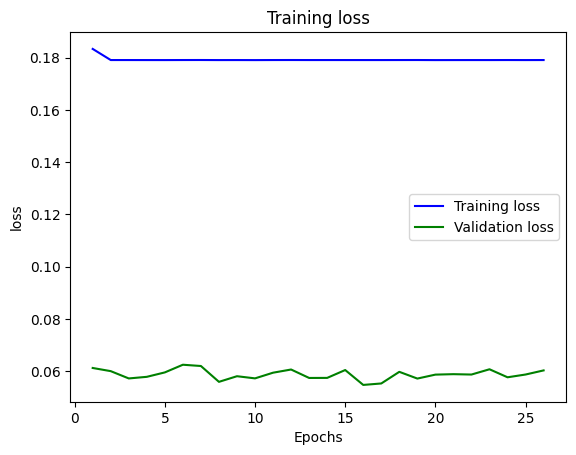

1618/1618 [==============================] - 2s 932us/step


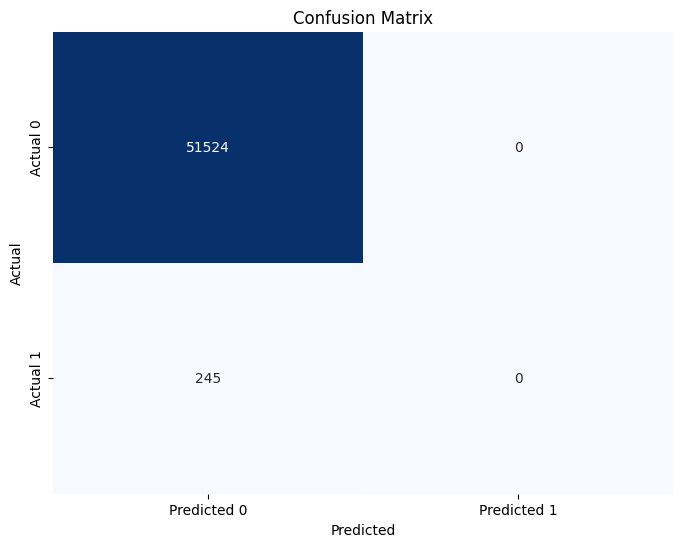

In [ ]:
loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()


modelmistery.load_weights('/tmp/checkpoints')
predictions= modelmistery.predict(x_test)
df_y=pd.DataFrame(np.concatenate((predictions, y_test.reshape(-1,1)),axis=1), columns=['predictions','true'])
df_y['predict_bin']=(df_y['predictions']>0.5).astype(int)


confusion = confusion_matrix(df_y['true'].astype(int), df_y['predict_bin'])

# crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
y_pred = df_y['predict_bin']
y_true = df_y['true'].astype(int)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.9952674380420715
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### modelos más simples generan mejor ajuste de los datos, pero el modelo de concavo/convexo no funcionó, se correra de nuevo el modelo original con bajas neuronas y de dispersión pero ahora se utilizará cambios en las funciones de activación.

### Modelo original

Epoch 1/300
13467/13467 [==============================] - 24s 2ms/step - loss: 0.0859 - accuracy: 0.0041 - val_loss: 0.0260 - val_accuracy: 0.0000e+00
Epoch 2/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.0489 - accuracy: 0.0000e+00 - val_loss: 0.0202 - val_accuracy: 0.0000e+00
Epoch 3/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.0474 - accuracy: 0.0000e+00 - val_loss: 0.0297 - val_accuracy: 0.0000e+00
Epoch 4/300
13467/13467 [==============================] - 20s 1ms/step - loss: 0.0568 - accuracy: 1.2995e-04 - val_loss: 0.0558 - val_accuracy: 0.0000e+00
Epoch 5/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.0471 - accuracy: 0.0000e+00 - val_loss: 0.0236 - val_accuracy: 0.0000e+00
Epoch 6/300
13467/13467 [==============================] - 20s 1ms/step - loss: 0.0428 - accuracy: 0.0000e+00 - val_loss: 0.0208 - val_accuracy: 0.0000e+00
Epoch 7/300
13467/13467 [==============================] - 20s 2ms/s

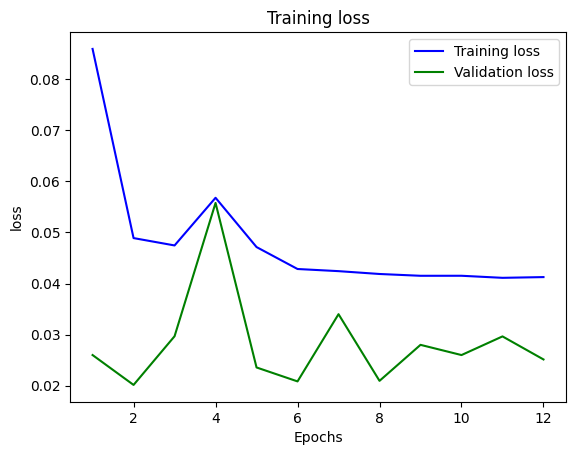

1618/1618 [==============================] - 1s 872us/step


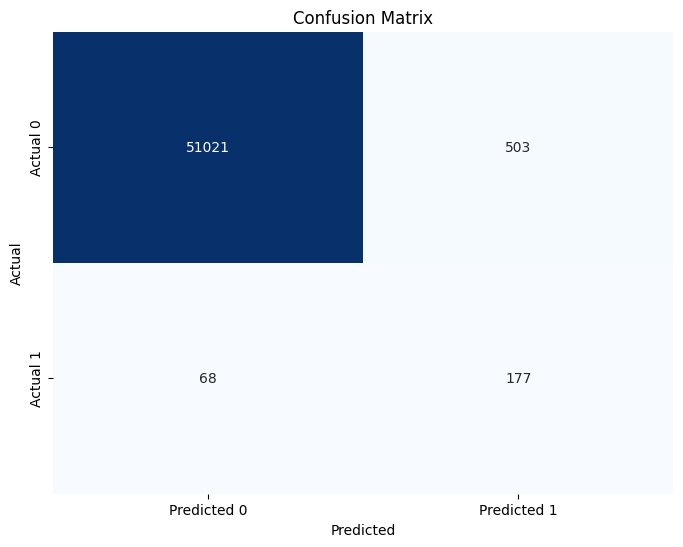

In [ ]:
# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint ( se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint= ModelCheckpoint(filepath='/tmp/checkpoints',monitor='val_loss', mode='min',save_best_only=True)

desired_ratio = 0.05
total_samples = len(y_train)

num_desired_ones = int(total_samples * desired_ratio)
num_existing_ones = np.sum(y_train == 1)
num_synthetic_ones = num_desired_ones - num_existing_ones
smote = SMOTE(sampling_strategy={1: num_synthetic_ones}, random_state=123)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


modelmistery=keras.Sequential()
modelmistery.add(layers.Dense(4, activation='relu', input_shape=(len(x_train_resampled[1]),)))
modelmistery.add(layers.Dense(8, activation='relu'))
modelmistery.add(layers.Dense(16, activation='relu'))
modelmistery.add(layers.Dense(1, activation='sigmoid'))
modelmistery.compile(optimizer=Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=[keras.metrics.Accuracy()])
# La función fit recibe los callbacks declarados
history = modelmistery.fit(x=x_train_resampled,y= y_train_resampled, epochs=300, batch_size=32, validation_data=(x_val, y_val),callbacks=[callback_early, callback_checkpoint])

loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()


modelmistery.load_weights('/tmp/checkpoints')
predictions= modelmistery.predict(x_test)
df_y=pd.DataFrame(np.concatenate((predictions, y_test.reshape(-1,1)),axis=1), columns=['predictions','true'])
df_y['predict_bin']=(df_y['predictions']>0.5).astype(int)


confusion = confusion_matrix(df_y['true'].astype(int), df_y['predict_bin'])

# crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
y_pred = df_y['predict_bin']
y_true = df_y['true'].astype(int)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.9889702331511137
Precision: 0.26029411764705884
Recall: 0.7224489795918367
F1-Score: 0.38270270270270274


#### demuestra un comportamiento estable vs corridas anteriores, ahora se ajustará las funciones de activación

### TANH activación

Epoch 1/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.1793 - accuracy: 0.0000e+00 - val_loss: 0.0486 - val_accuracy: 0.0000e+00
Epoch 2/300
13467/13467 [==============================] - 20s 2ms/step - loss: 0.1796 - accuracy: 0.0000e+00 - val_loss: 0.0676 - val_accuracy: 0.0000e+00
Epoch 3/300
13467/13467 [==============================] - 20s 1ms/step - loss: 0.1797 - accuracy: 0.0000e+00 - val_loss: 0.0787 - val_accuracy: 0.0000e+00
Epoch 4/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.1797 - accuracy: 0.0000e+00 - val_loss: 0.0513 - val_accuracy: 0.0000e+00
Epoch 5/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.1796 - accuracy: 0.0000e+00 - val_loss: 0.0527 - val_accuracy: 0.0000e+00
Epoch 6/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.1799 - accuracy: 0.0000e+00 - val_loss: 0.0640 - val_accuracy: 0.0000e+00
Epoch 7/300
13467/13467 [==============================] - 20s 1

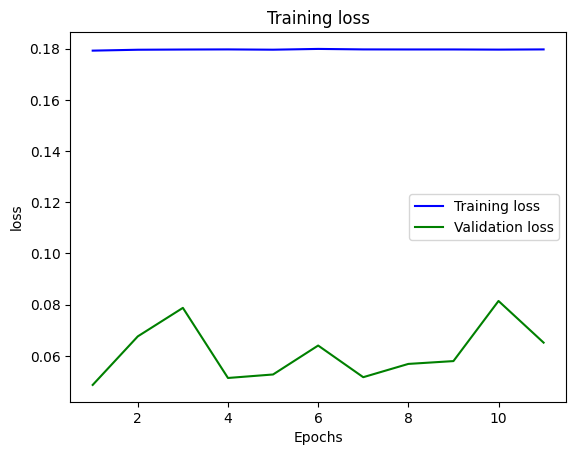

1618/1618 [==============================] - 1s 860us/step


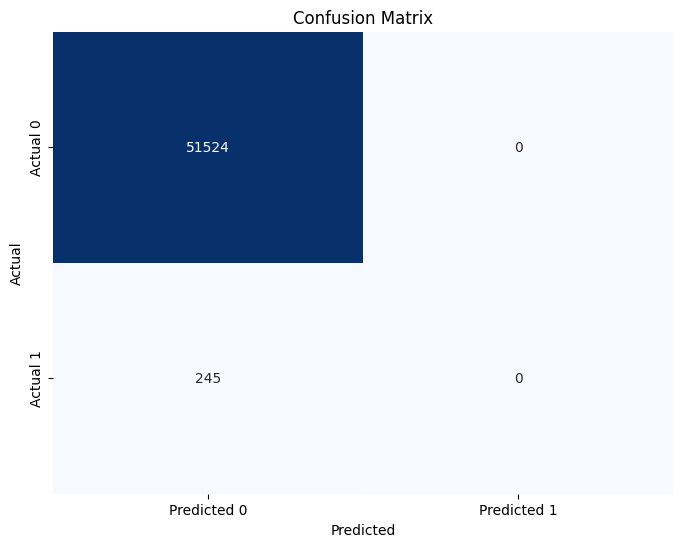

In [ ]:
# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint ( se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint= ModelCheckpoint(filepath='/tmp/checkpoints',monitor='val_loss', mode='min',save_best_only=True)

desired_ratio = 0.05
total_samples = len(y_train)

num_desired_ones = int(total_samples * desired_ratio)
num_existing_ones = np.sum(y_train == 1)
num_synthetic_ones = num_desired_ones - num_existing_ones
smote = SMOTE(sampling_strategy={1: num_synthetic_ones}, random_state=123)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


modelmistery=keras.Sequential()
modelmistery.add(layers.Dense(4, activation='tanh', input_shape=(len(x_train_resampled[1]),)))
modelmistery.add(layers.Dense(8, activation='tanh'))
modelmistery.add(layers.Dense(16, activation='tanh'))
modelmistery.add(layers.Dense(1, activation='sigmoid'))
modelmistery.compile(optimizer=Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=[keras.metrics.Accuracy()])
# La función fit recibe los callbacks declarados
history = modelmistery.fit(x=x_train_resampled,y= y_train_resampled, epochs=300, batch_size=32, validation_data=(x_val, y_val),callbacks=[callback_early, callback_checkpoint])

loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()


modelmistery.load_weights('/tmp/checkpoints')
predictions= modelmistery.predict(x_test)
df_y=pd.DataFrame(np.concatenate((predictions, y_test.reshape(-1,1)),axis=1), columns=['predictions','true'])
df_y['predict_bin']=(df_y['predictions']>0.5).astype(int)


confusion = confusion_matrix(df_y['true'].astype(int), df_y['predict_bin'])

# crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
y_pred = df_y['predict_bin']
y_true = df_y['true'].astype(int)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.9952674380420715
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### TANH en todas las capas no funcionó, se dejará en la capa de la mitad

### RELU + TANH

Epoch 1/300
13467/13467 [==============================] - 34s 2ms/step - loss: 0.1804 - accuracy: 0.0000e+00 - val_loss: 0.0509 - val_accuracy: 0.0000e+00
Epoch 2/300
13467/13467 [==============================] - 33s 2ms/step - loss: 0.1794 - accuracy: 0.0000e+00 - val_loss: 0.0619 - val_accuracy: 0.0000e+00
Epoch 3/300
13467/13467 [==============================] - 32s 2ms/step - loss: 0.1790 - accuracy: 0.0000e+00 - val_loss: 0.0593 - val_accuracy: 0.0000e+00
Epoch 4/300
13467/13467 [==============================] - 31s 2ms/step - loss: 0.1790 - accuracy: 0.0000e+00 - val_loss: 0.0618 - val_accuracy: 0.0000e+00
Epoch 5/300
13467/13467 [==============================] - 31s 2ms/step - loss: 0.1790 - accuracy: 0.0000e+00 - val_loss: 0.0581 - val_accuracy: 0.0000e+00
Epoch 6/300
13467/13467 [==============================] - 33s 2ms/step - loss: 0.1790 - accuracy: 0.0000e+00 - val_loss: 0.0550 - val_accuracy: 0.0000e+00
Epoch 7/300
13467/13467 [==============================] - 36s 3

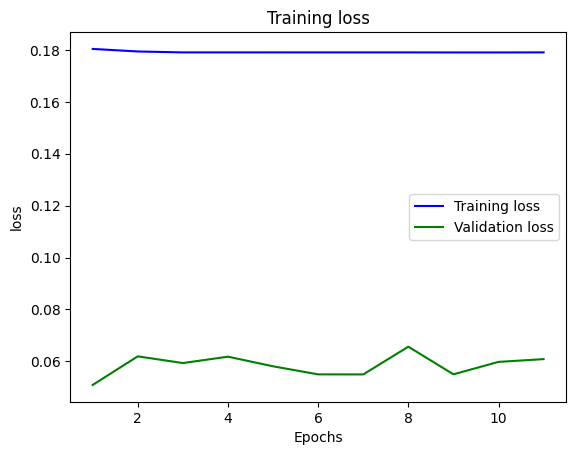

1618/1618 [==============================] - 3s 2ms/step


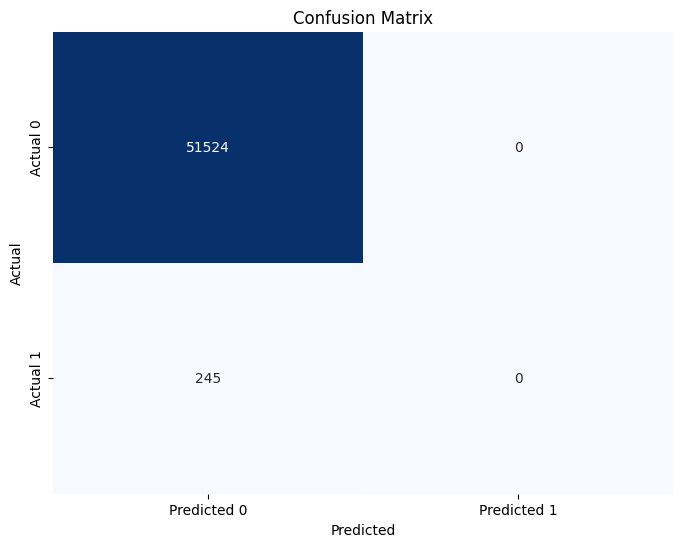

In [ ]:
# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint ( se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint= ModelCheckpoint(filepath='/tmp/checkpoints',monitor='val_loss', mode='min',save_best_only=True)

desired_ratio = 0.05
total_samples = len(y_train)

num_desired_ones = int(total_samples * desired_ratio)
num_existing_ones = np.sum(y_train == 1)
num_synthetic_ones = num_desired_ones - num_existing_ones
smote = SMOTE(sampling_strategy={1: num_synthetic_ones}, random_state=123)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


modelmistery=keras.Sequential()
modelmistery.add(layers.Dense(4, activation='relu', input_shape=(len(x_train_resampled[1]),)))
modelmistery.add(layers.Dense(8, activation='tanh'))
modelmistery.add(layers.Dense(16, activation='relu'))
modelmistery.add(layers.Dense(1, activation='sigmoid'))
modelmistery.compile(optimizer=Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=[keras.metrics.Accuracy()])
# La función fit recibe los callbacks declarados
history = modelmistery.fit(x=x_train_resampled,y= y_train_resampled, epochs=300, batch_size=32, validation_data=(x_val, y_val),callbacks=[callback_early, callback_checkpoint])

loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()


modelmistery.load_weights('/tmp/checkpoints')
predictions= modelmistery.predict(x_test)
df_y=pd.DataFrame(np.concatenate((predictions, y_test.reshape(-1,1)),axis=1), columns=['predictions','true'])
df_y['predict_bin']=(df_y['predictions']>0.5).astype(int)


confusion = confusion_matrix(df_y['true'].astype(int), df_y['predict_bin'])

# crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
y_pred = df_y['predict_bin']
y_true = df_y['true'].astype(int)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.9952674380420715
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### la función tanh no tuvo efecto positivo ni su uso total o parcial, se cambiara a otra funcion de activación

### Leaky Relu

Epoch 1/300
13467/13467 [==============================] - 34s 2ms/step - loss: 0.0565 - accuracy: 0.0405 - val_loss: 0.0201 - val_accuracy: 0.0000e+00
Epoch 2/300
13467/13467 [==============================] - 35s 3ms/step - loss: 0.0450 - accuracy: 0.0311 - val_loss: 0.0280 - val_accuracy: 0.0041
Epoch 3/300
13467/13467 [==============================] - 32s 2ms/step - loss: 0.0465 - accuracy: 0.0296 - val_loss: 0.0313 - val_accuracy: 0.0018
Epoch 4/300
13467/13467 [==============================] - 35s 3ms/step - loss: 0.0484 - accuracy: 0.0791 - val_loss: 0.0156 - val_accuracy: 0.4961
Epoch 5/300
13467/13467 [==============================] - 32s 2ms/step - loss: 0.0406 - accuracy: 0.3469 - val_loss: 0.0324 - val_accuracy: 0.3150
Epoch 6/300
13467/13467 [==============================] - 33s 2ms/step - loss: 0.0615 - accuracy: 0.2962 - val_loss: 0.0117 - val_accuracy: 0.4185
Epoch 7/300
13467/13467 [==============================] - 32s 2ms/step - loss: 0.0419 - accuracy: 0.2433 - 

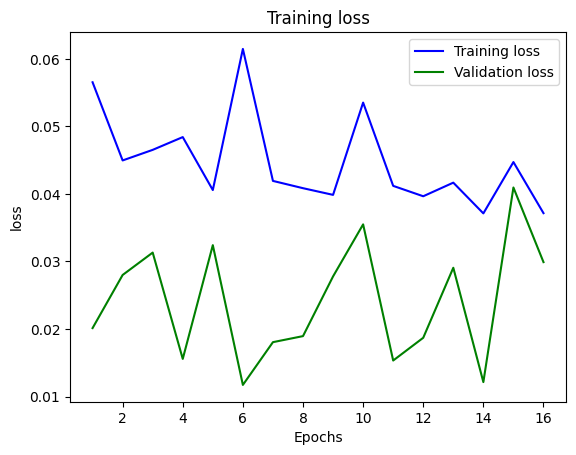

1618/1618 [==============================] - 2s 1ms/step


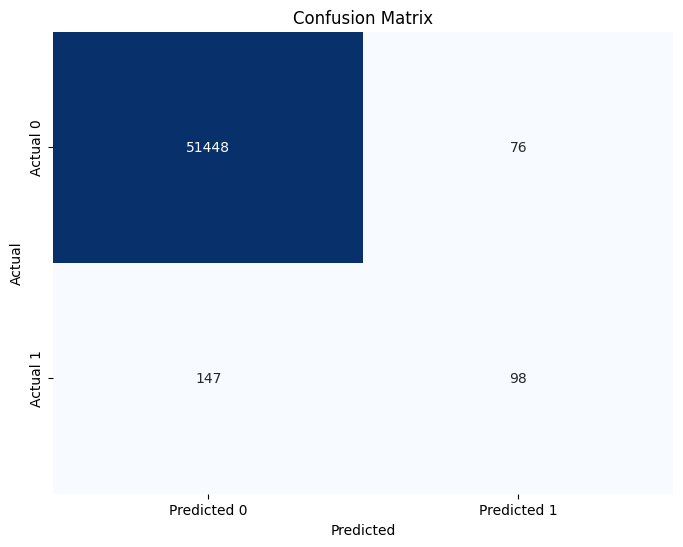

Accuracy: 0.995692402789314
Precision: 0.5632183908045977
Recall: 0.4
F1-Score: 0.4677804295942721


In [ ]:
from keras.layers import LeakyReLU
# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint ( se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint= ModelCheckpoint(filepath='/tmp/checkpoints',monitor='val_loss', mode='min',save_best_only=True)

desired_ratio = 0.05
total_samples = len(y_train)

num_desired_ones = int(total_samples * desired_ratio)
num_existing_ones = np.sum(y_train == 1)
num_synthetic_ones = num_desired_ones - num_existing_ones
smote = SMOTE(sampling_strategy={1: num_synthetic_ones}, random_state=123)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


modelmistery=keras.Sequential()
modelmistery.add(layers.Dense(4, activation=LeakyReLU(alpha=0.1), input_shape=(len(x_train_resampled[1]),)))
modelmistery.add(layers.Dense(8, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(16, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(1, activation='sigmoid'))
modelmistery.compile(optimizer=Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=[keras.metrics.Accuracy()])
# La función fit recibe los callbacks declarados
history = modelmistery.fit(x=x_train_resampled,y= y_train_resampled, epochs=300, batch_size=32, validation_data=(x_val, y_val),callbacks=[callback_early, callback_checkpoint])

loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()


modelmistery.load_weights('/tmp/checkpoints')
predictions= modelmistery.predict(x_test)
df_y=pd.DataFrame(np.concatenate((predictions, y_test.reshape(-1,1)),axis=1), columns=['predictions','true'])
df_y['predict_bin']=(df_y['predictions']>0.5).astype(int)


confusion = confusion_matrix(df_y['true'].astype(int), df_y['predict_bin'])

# crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


y_pred = df_y['predict_bin']
y_true = df_y['true'].astype(int)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

y_pred = df_y['predict_bin']
y_true = df_y['true'].astype(int)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.9957889856864146
Precision: 0.5658536585365853
Recall: 0.47346938775510206
F1-Score: 0.5155555555555555


#### aunque la gráfica es inestable, tiene buen comportamiento en los indicadores, se repetirá para saber si mantiene el buen performance

### leaky relu otra vez

Epoch 1/300
13467/13467 [==============================] - 29s 2ms/step - loss: 0.0565 - accuracy: 0.0997 - val_loss: 0.0222 - val_accuracy: 0.0356
Epoch 2/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.0443 - accuracy: 0.2790 - val_loss: 0.0271 - val_accuracy: 0.8075
Epoch 3/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.0482 - accuracy: 0.4814 - val_loss: 0.0143 - val_accuracy: 0.9130
Epoch 4/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.0425 - accuracy: 0.5102 - val_loss: 0.0178 - val_accuracy: 0.8185
Epoch 5/300
13467/13467 [==============================] - 19s 1ms/step - loss: 0.0416 - accuracy: 0.6024 - val_loss: 0.0171 - val_accuracy: 0.9074
Epoch 6/300
13467/13467 [==============================] - 20s 2ms/step - loss: 0.0602 - accuracy: 0.6555 - val_loss: 0.0296 - val_accuracy: 0.7669
Epoch 7/300
13467/13467 [==============================] - 19s 1ms/step - loss: 0.0396 - accuracy: 0.7152 - val_

13467/13467 [==============================] - 22s 2ms/step - loss: 0.0319 - accuracy: 0.8490 - val_loss: 0.0101 - val_accuracy: 0.9281
Epoch 20/300
13467/13467 [==============================] - 20s 1ms/step - loss: 0.0331 - accuracy: 0.8375 - val_loss: 0.0122 - val_accuracy: 0.9084
Epoch 21/300
13467/13467 [==============================] - 19s 1ms/step - loss: 0.0351 - accuracy: 0.7935 - val_loss: 0.0198 - val_accuracy: 0.9108
Epoch 22/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.0325 - accuracy: 0.8425 - val_loss: 0.0138 - val_accuracy: 0.8429
Epoch 23/300
13467/13467 [==============================] - 19s 1ms/step - loss: 0.0339 - accuracy: 0.8074 - val_loss: 0.0215 - val_accuracy: 0.7433
Epoch 24/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.0329 - accuracy: 0.8137 - val_loss: 0.0166 - val_accuracy: 0.8996
Epoch 25/300
13467/13467 [==============================] - 20s 2ms/step - loss: 0.0337 - accuracy: 0.8388 - val_loss: 

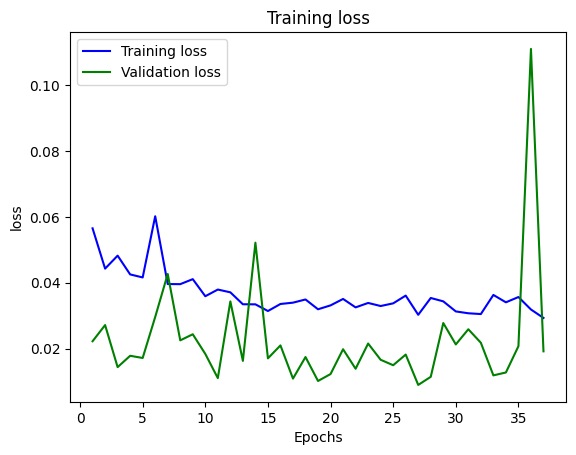

1618/1618 [==============================] - 2s 933us/step


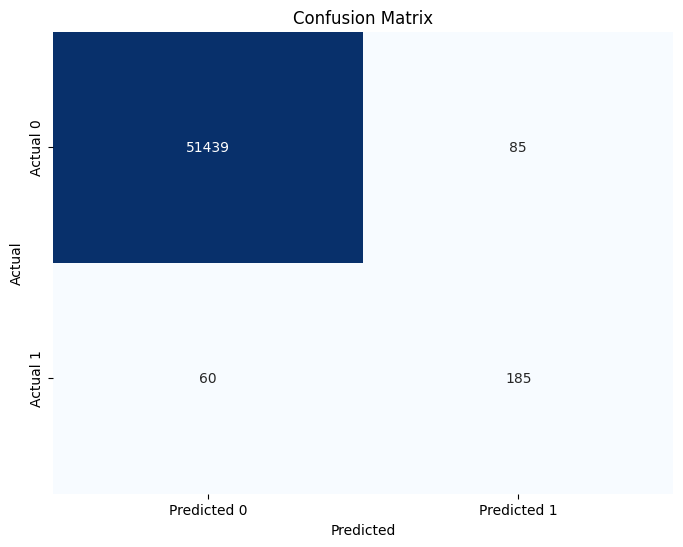

Accuracy: 0.9971990959840832
Precision: 0.6851851851851852
Recall: 0.7551020408163265
F1-Score: 0.7184466019417475


In [ ]:
from keras.layers import LeakyReLU
# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint ( se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint= ModelCheckpoint(filepath='/tmp/checkpoints',monitor='val_loss', mode='min',save_best_only=True)

desired_ratio = 0.05
total_samples = len(y_train)

num_desired_ones = int(total_samples * desired_ratio)
num_existing_ones = np.sum(y_train == 1)
num_synthetic_ones = num_desired_ones - num_existing_ones
smote = SMOTE(sampling_strategy={1: num_synthetic_ones}, random_state=123)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


modelmistery=keras.Sequential()
modelmistery.add(layers.Dense(4, activation=LeakyReLU(alpha=0.1), input_shape=(len(x_train_resampled[1]),)))
modelmistery.add(layers.Dense(8, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(16, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(1, activation='sigmoid'))
modelmistery.compile(optimizer=Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=[keras.metrics.Accuracy()])
# La función fit recibe los callbacks declarados
history = modelmistery.fit(x=x_train_resampled,y= y_train_resampled, epochs=300, batch_size=32, validation_data=(x_val, y_val),callbacks=[callback_early, callback_checkpoint])

loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()


modelmistery.load_weights('/tmp/checkpoints')
predictions= modelmistery.predict(x_test)
df_y=pd.DataFrame(np.concatenate((predictions, y_test.reshape(-1,1)),axis=1), columns=['predictions','true'])
df_y['predict_bin']=(df_y['predictions']>0.5).astype(int)


confusion = confusion_matrix(df_y['true'].astype(int), df_y['predict_bin'])

# crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


y_pred = df_y['predict_bin']
y_true = df_y['true'].astype(int)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

#### Leaky relu mantiene un comportamiento estable para accuracy, pero el error presenta inestabilidad, se probaran otras funciones basadas en ReLu para revisar un mejor comportamiento del error.

### PRELU

Epoch 1/300
13467/13467 [==============================] - 29s 2ms/step - loss: 0.0561 - accuracy: 0.0125 - val_loss: 0.0241 - val_accuracy: 0.0890
Epoch 2/300
13467/13467 [==============================] - 23s 2ms/step - loss: 0.0498 - accuracy: 0.2895 - val_loss: 0.0373 - val_accuracy: 0.1393
Epoch 3/300
13467/13467 [==============================] - 23s 2ms/step - loss: 0.0526 - accuracy: 0.3846 - val_loss: 0.0370 - val_accuracy: 0.4589
Epoch 4/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.0512 - accuracy: 0.3168 - val_loss: 0.0273 - val_accuracy: 0.0890
Epoch 5/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.0497 - accuracy: 0.2752 - val_loss: 0.0338 - val_accuracy: 0.2917
Epoch 6/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.0469 - accuracy: 0.3640 - val_loss: 0.0179 - val_accuracy: 0.1024
Epoch 7/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.0427 - accuracy: 0.1980 - val_

13467/13467 [==============================] - 24s 2ms/step - loss: 0.0495 - accuracy: 0.2932 - val_loss: 0.0118 - val_accuracy: 0.8757
Epoch 17/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.0548 - accuracy: 0.3178 - val_loss: 0.0494 - val_accuracy: 0.0258
Epoch 18/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.0420 - accuracy: 0.0348 - val_loss: 0.0369 - val_accuracy: 0.1121
Epoch 19/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.0432 - accuracy: 0.0827 - val_loss: 0.0206 - val_accuracy: 0.8692
Epoch 20/300
13467/13467 [==============================] - 23s 2ms/step - loss: 0.0396 - accuracy: 0.2025 - val_loss: 0.0329 - val_accuracy: 0.0000e+00
Epoch 21/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.0455 - accuracy: 0.3478 - val_loss: 0.0277 - val_accuracy: 0.8093
Epoch 22/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.0440 - accuracy: 0.1896 - val_lo

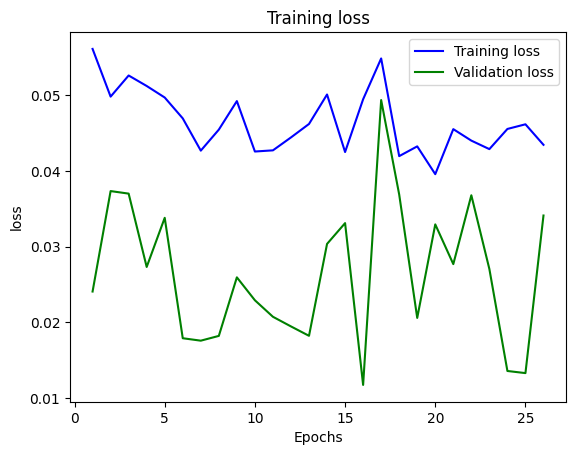

1618/1618 [==============================] - 2s 964us/step


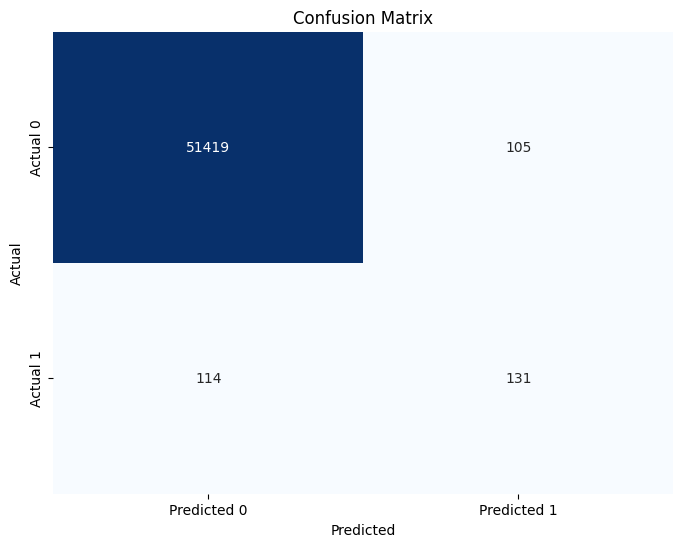

Accuracy: 0.9957696691069945
Precision: 0.5550847457627118
Recall: 0.5346938775510204
F1-Score: 0.5446985446985447


In [ ]:
from keras.layers import PReLU
# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint ( se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint= ModelCheckpoint(filepath='/tmp/checkpoints',monitor='val_loss', mode='min',save_best_only=True)

desired_ratio = 0.05
total_samples = len(y_train)

num_desired_ones = int(total_samples * desired_ratio)
num_existing_ones = np.sum(y_train == 1)
num_synthetic_ones = num_desired_ones - num_existing_ones
smote = SMOTE(sampling_strategy={1: num_synthetic_ones}, random_state=123)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


modelmistery=keras.Sequential()
modelmistery.add(layers.Dense(4, activation=PReLU(), input_shape=(len(x_train_resampled[1]),)))
modelmistery.add(layers.Dense(8, activation=PReLU()))
modelmistery.add(layers.Dense(16, activation=PReLU()))
modelmistery.add(layers.Dense(1, activation='sigmoid'))
modelmistery.compile(optimizer=Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=[keras.metrics.Accuracy()])
# La función fit recibe los callbacks declarados
history = modelmistery.fit(x=x_train_resampled,y= y_train_resampled, epochs=300, batch_size=32, validation_data=(x_val, y_val),callbacks=[callback_early, callback_checkpoint])

loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()


modelmistery.load_weights('/tmp/checkpoints')
predictions= modelmistery.predict(x_test)
df_y=pd.DataFrame(np.concatenate((predictions, y_test.reshape(-1,1)),axis=1), columns=['predictions','true'])
df_y['predict_bin']=(df_y['predictions']>0.5).astype(int)


confusion = confusion_matrix(df_y['true'].astype(int), df_y['predict_bin'])

# crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


y_pred = df_y['predict_bin']
y_true = df_y['true'].astype(int)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

#### Comportamiento similiar a Leaky Relu, se probaran otras funciones

### SWISH

Epoch 1/300
13467/13467 [==============================] - 38s 3ms/step - loss: 0.1723 - accuracy: 0.3081 - val_loss: 0.0539 - val_accuracy: 0.0000e+00
Epoch 2/300
13467/13467 [==============================] - 23s 2ms/step - loss: 0.1661 - accuracy: 0.0072 - val_loss: 0.0673 - val_accuracy: 0.0000e+00
Epoch 3/300
13467/13467 [==============================] - 20s 2ms/step - loss: 0.1942 - accuracy: 4.8731e-04 - val_loss: 0.0616 - val_accuracy: 0.0000e+00
Epoch 4/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.1451 - accuracy: 0.0055 - val_loss: 0.0528 - val_accuracy: 0.0000e+00
Epoch 5/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.1618 - accuracy: 0.0235 - val_loss: 0.0647 - val_accuracy: 0.0000e+00
Epoch 6/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.1790 - accuracy: 0.0000e+00 - val_loss: 0.0601 - val_accuracy: 0.0000e+00
Epoch 7/300
13467/13467 [==============================] - 21s 2ms/step - loss: 

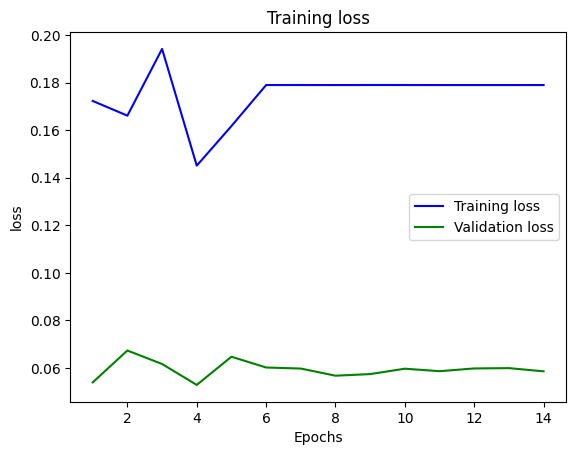

1618/1618 [==============================] - 2s 911us/step


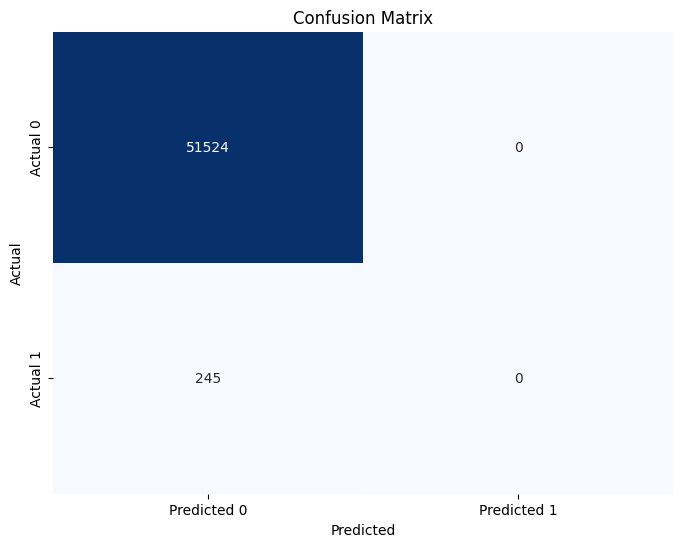

Accuracy: 0.9952674380420715
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import keras.backend as K
def swish(x):
    return x * K.sigmoid(x)

# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint ( se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint= ModelCheckpoint(filepath='/tmp/checkpoints',monitor='val_loss', mode='min',save_best_only=True)

desired_ratio = 0.05
total_samples = len(y_train)

num_desired_ones = int(total_samples * desired_ratio)
num_existing_ones = np.sum(y_train == 1)
num_synthetic_ones = num_desired_ones - num_existing_ones
smote = SMOTE(sampling_strategy={1: num_synthetic_ones}, random_state=123)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


modelmistery = keras.Sequential()
modelmistery.add(layers.Dense(4, activation=swish, input_shape=(len(x_train_resampled[1]),)))
modelmistery.add(layers.Dense(8, activation=swish))
modelmistery.add(layers.Dense(16, activation=swish))
modelmistery.add(layers.Dense(1, activation='sigmoid'))
modelmistery.compile(optimizer=Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=[keras.metrics.Accuracy()])
# La función fit recibe los callbacks declarados
history = modelmistery.fit(x=x_train_resampled,y= y_train_resampled, epochs=300, batch_size=32, validation_data=(x_val, y_val),callbacks=[callback_early, callback_checkpoint])

loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()


modelmistery.load_weights('/tmp/checkpoints')
predictions= modelmistery.predict(x_test)
df_y=pd.DataFrame(np.concatenate((predictions, y_test.reshape(-1,1)),axis=1), columns=['predictions','true'])
df_y['predict_bin']=(df_y['predictions']>0.5).astype(int)


confusion = confusion_matrix(df_y['true'].astype(int), df_y['predict_bin'])

# crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


y_pred = df_y['predict_bin']
y_true = df_y['true'].astype(int)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

#### Para los datos de este modelo, la activación SWISH no fue la más apropiada

### LeakyRelu más capas

Epoch 1/300
13467/13467 [==============================] - 30s 2ms/step - loss: 0.0879 - accuracy: 0.2039 - val_loss: 0.1412 - val_accuracy: 0.2576
Epoch 2/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.0431 - accuracy: 0.1724 - val_loss: 0.0158 - val_accuracy: 0.3036
Epoch 3/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.0741 - accuracy: 0.1727 - val_loss: 0.0151 - val_accuracy: 0.5417
Epoch 4/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.0738 - accuracy: 0.3462 - val_loss: 0.0392 - val_accuracy: 0.2256
Epoch 5/300
13447/13467 [============================>.] - ETA: 0s - loss: 0.0530 - accuracy: 0.4468

13467/13467 [==============================] - 23s 2ms/step - loss: 0.0530 - accuracy: 0.4468 - val_loss: 0.0123 - val_accuracy: 0.4591
Epoch 6/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.0652 - accuracy: 0.5574 - val_loss: 0.0279 - val_accuracy: 0.6917
Epoch 7/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.0459 - accuracy: 0.3112 - val_loss: 0.0172 - val_accuracy: 0.6725
Epoch 8/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.0965 - accuracy: 0.5722 - val_loss: 0.0135 - val_accuracy: 0.8536
Epoch 9/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.0486 - accuracy: 0.5777 - val_loss: 0.0173 - val_accuracy: 8.6926e-04
Epoch 10/300
13467/13467 [==============================] - 23s 2ms/step - loss: 0.0537 - accuracy: 0.2815 - val_loss: 0.0110 - val_accuracy: 0.2692
Epoch 11/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.0549 - accuracy: 0.6296 - val_loss: 

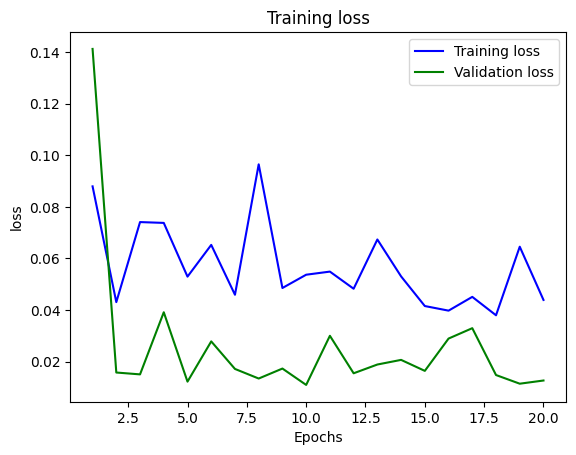

1618/1618 [==============================] - 2s 923us/step


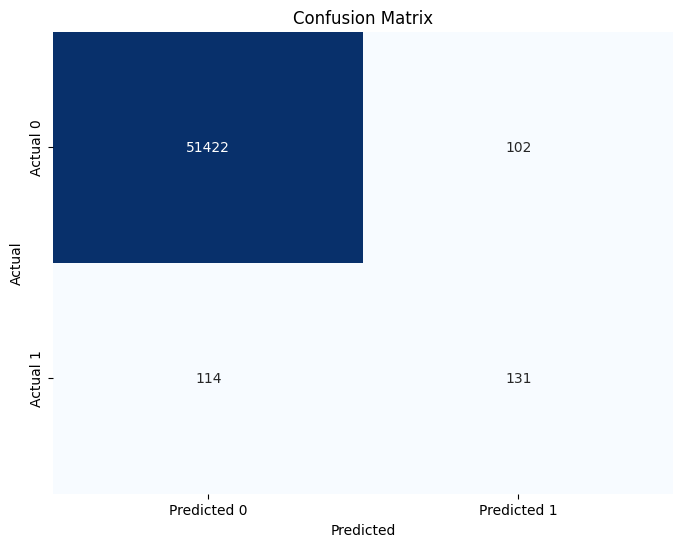

Accuracy: 0.9958276188452548
Precision: 0.5622317596566524
Recall: 0.5346938775510204
F1-Score: 0.5481171548117154


In [ ]:
from keras.layers import LeakyReLU
# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint ( se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint= ModelCheckpoint(filepath='/tmp/checkpoints',monitor='val_loss', mode='min',save_best_only=True)

desired_ratio = 0.05
total_samples = len(y_train)

num_desired_ones = int(total_samples * desired_ratio)
num_existing_ones = np.sum(y_train == 1)
num_synthetic_ones = num_desired_ones - num_existing_ones
smote = SMOTE(sampling_strategy={1: num_synthetic_ones}, random_state=123)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


modelmistery=keras.Sequential()
modelmistery.add(layers.Dense(4, activation=LeakyReLU(alpha=0.1), input_shape=(len(x_train_resampled[1]),)))
modelmistery.add(layers.Dense(8, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(16, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(32, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(1, activation='sigmoid'))
modelmistery.compile(optimizer=Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=[keras.metrics.Accuracy()])
# La función fit recibe los callbacks declarados
history = modelmistery.fit(x=x_train_resampled,y= y_train_resampled, epochs=300, batch_size=32, validation_data=(x_val, y_val),callbacks=[callback_early, callback_checkpoint])

loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()


modelmistery.load_weights('/tmp/checkpoints')
predictions= modelmistery.predict(x_test)
df_y=pd.DataFrame(np.concatenate((predictions, y_test.reshape(-1,1)),axis=1), columns=['predictions','true'])
df_y['predict_bin']=(df_y['predictions']>0.5).astype(int)


confusion = confusion_matrix(df_y['true'].astype(int), df_y['predict_bin'])

# crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


y_pred = df_y['predict_bin']
y_true = df_y['true'].astype(int)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

#### Más capas muestran un mejor ocmportamiento en los indicadores de precisión y Recal, pero el accuracy se mantiene

### Leaky Relu + neuronas

Epoch 1/300
13467/13467 [==============================] - 23s 2ms/step - loss: 0.4608 - accuracy: 0.3044 - val_loss: 0.0203 - val_accuracy: 0.1122
Epoch 2/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.1595 - accuracy: 0.4462 - val_loss: 0.0392 - val_accuracy: 0.6646
Epoch 3/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.3442 - accuracy: 0.6050 - val_loss: 0.1676 - val_accuracy: 0.6372
Epoch 4/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.3619 - accuracy: 0.4469 - val_loss: 0.2280 - val_accuracy: 0.1799
Epoch 5/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.0904 - accuracy: 0.2991 - val_loss: 0.0431 - val_accuracy: 0.0054
Epoch 6/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.1763 - accuracy: 0.5128 - val_loss: 0.0350 - val_accuracy: 0.6509
Epoch 7/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.1172 - accuracy: 0.4765 - val_

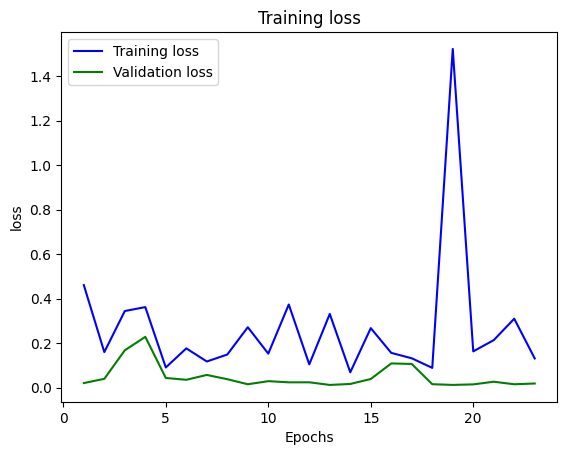

 491/1618 [========>.....................] - ETA: 1s

1618/1618 [==============================] - 2s 1ms/step


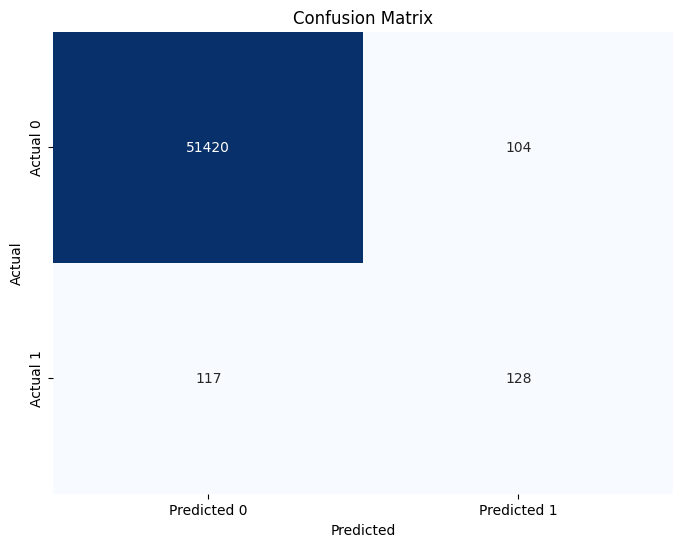

Accuracy: 0.9957310359481543
Precision: 0.5517241379310345
Recall: 0.5224489795918368
F1-Score: 0.5366876310272537


In [ ]:
from keras.layers import LeakyReLU
# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint ( se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint= ModelCheckpoint(filepath='/tmp/checkpoints',monitor='val_loss', mode='min',save_best_only=True)

desired_ratio = 0.05
total_samples = len(y_train)

num_desired_ones = int(total_samples * desired_ratio)
num_existing_ones = np.sum(y_train == 1)
num_synthetic_ones = num_desired_ones - num_existing_ones
smote = SMOTE(sampling_strategy={1: num_synthetic_ones}, random_state=123)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


modelmistery=keras.Sequential()
modelmistery.add(layers.Dense(8, activation=LeakyReLU(alpha=0.1), input_shape=(len(x_train_resampled[1]),)))
modelmistery.add(layers.Dense(16, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(32, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(64, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(1, activation='sigmoid'))
modelmistery.compile(optimizer=Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=[keras.metrics.Accuracy()])
# La función fit recibe los callbacks declarados
history = modelmistery.fit(x=x_train_resampled,y= y_train_resampled, epochs=300, batch_size=32, validation_data=(x_val, y_val),callbacks=[callback_early, callback_checkpoint])

loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()


modelmistery.load_weights('/tmp/checkpoints')
predictions= modelmistery.predict(x_test)
df_y=pd.DataFrame(np.concatenate((predictions, y_test.reshape(-1,1)),axis=1), columns=['predictions','true'])
df_y['predict_bin']=(df_y['predictions']>0.5).astype(int)


confusion = confusion_matrix(df_y['true'].astype(int), df_y['predict_bin'])

# crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


y_pred = df_y['predict_bin']
y_true = df_y['true'].astype(int)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

#### No hay un cambio significativo en el falor del F1-score vs más neuronas o el modelo general, por lo que se utilizarán otros metodos para mejorar este indicador

### Normalización + Leaky ReLu

Epoch 1/300
13467/13467 [==============================] - 25s 2ms/step - loss: 0.1051 - accuracy: 0.0445 - val_loss: 0.0136 - val_accuracy: 0.0012
Epoch 2/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.0429 - accuracy: 0.1012 - val_loss: 0.0121 - val_accuracy: 0.0000e+00
Epoch 3/300
13467/13467 [==============================] - 23s 2ms/step - loss: 0.0389 - accuracy: 0.1359 - val_loss: 0.0101 - val_accuracy: 0.1863
Epoch 4/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.0461 - accuracy: 0.3177 - val_loss: 0.0199 - val_accuracy: 0.2497
Epoch 5/300
13467/13467 [==============================] - 23s 2ms/step - loss: 0.0469 - accuracy: 0.2546 - val_loss: 0.0424 - val_accuracy: 0.1242
Epoch 6/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.0443 - accuracy: 0.2399 - val_loss: 0.0156 - val_accuracy: 0.0036
Epoch 7/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.0382 - accuracy: 0.3998 - 

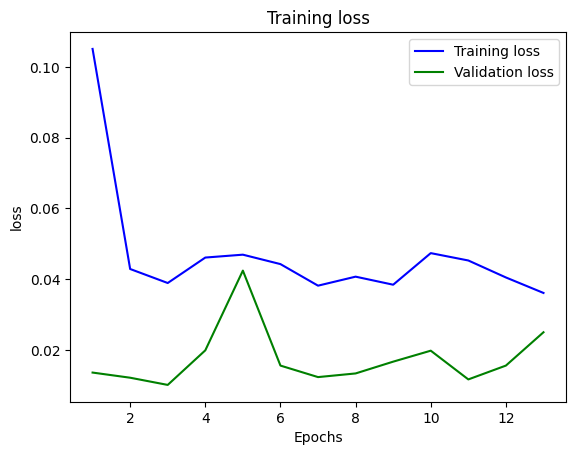

1618/1618 [==============================] - 2s 1ms/step


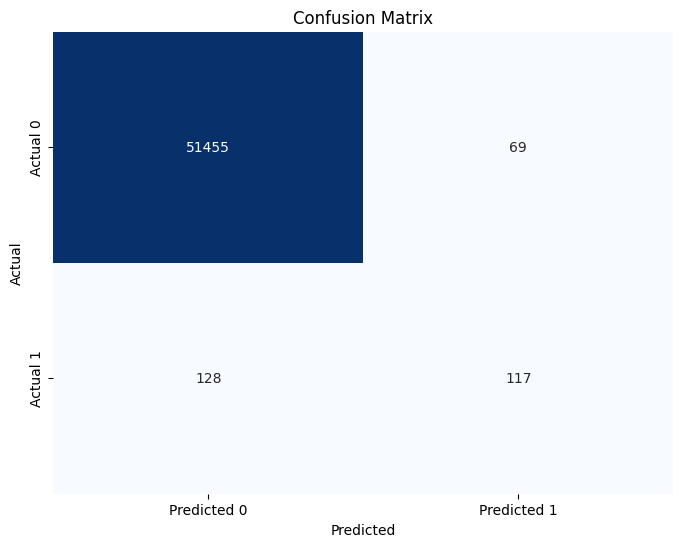

Accuracy: 0.9961946338542371
Precision: 0.6290322580645161
Recall: 0.4775510204081633
F1-Score: 0.54292343387471


In [ ]:
from keras.layers import LeakyReLU
# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint ( se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint= ModelCheckpoint(filepath='/tmp/checkpoints',monitor='val_loss', mode='min',save_best_only=True)

desired_ratio = 0.05
total_samples = len(y_train)

num_desired_ones = int(total_samples * desired_ratio)
num_existing_ones = np.sum(y_train == 1)
num_synthetic_ones = num_desired_ones - num_existing_ones
smote = SMOTE(sampling_strategy={1: num_synthetic_ones}, random_state=123)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


#Normalizar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_resampled_normalized = scaler.fit_transform(x_train_resampled)
x_val_normalized = scaler.transform(x_val)
x_test_normalized = scaler.transform(x_test)


modelmistery=keras.Sequential()
modelmistery.add(layers.Dense(4, activation=LeakyReLU(alpha=0.1), input_shape=(len(x_train_resampled[1]),)))
modelmistery.add(layers.Dense(8, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(16, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(1, activation='sigmoid'))
modelmistery.compile(optimizer=Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=[keras.metrics.Accuracy()])
# La función fit recibe los callbacks declarados
history = modelmistery.fit(x=x_train_resampled,y= y_train_resampled, epochs=300, batch_size=32, validation_data=(x_val, y_val),callbacks=[callback_early, callback_checkpoint])

loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()


modelmistery.load_weights('/tmp/checkpoints')
predictions= modelmistery.predict(x_test)
df_y=pd.DataFrame(np.concatenate((predictions, y_test.reshape(-1,1)),axis=1), columns=['predictions','true'])
df_y['predict_bin']=(df_y['predictions']>0.5).astype(int)


confusion = confusion_matrix(df_y['true'].astype(int), df_y['predict_bin'])

# crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


y_pred = df_y['predict_bin']
y_true = df_y['true'].astype(int)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

#### Mejoró la precisión del modelo, por lo que se repetirá el experimento (para determinar si fue por aleatoriedad o si fue un mejor código)

### Repetición de experimento:

Epoch 1/300
13467/13467 [==============================] - 39s 3ms/step - loss: 0.0545 - accuracy: 0.2067 - val_loss: 0.0165 - val_accuracy: 0.3870
Epoch 2/300
13467/13467 [==============================] - 23s 2ms/step - loss: 0.0438 - accuracy: 0.0523 - val_loss: 0.0225 - val_accuracy: 0.3092
Epoch 3/300
13467/13467 [==============================] - 23s 2ms/step - loss: 0.0396 - accuracy: 0.1808 - val_loss: 0.0139 - val_accuracy: 0.6630
Epoch 4/300
13467/13467 [==============================] - 23s 2ms/step - loss: 0.0431 - accuracy: 0.1874 - val_loss: 0.0135 - val_accuracy: 0.0201
Epoch 5/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.0443 - accuracy: 0.3053 - val_loss: 0.0189 - val_accuracy: 0.3600
Epoch 6/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.0404 - accuracy: 0.3345 - val_loss: 0.0118 - val_accuracy: 0.3092
Epoch 7/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.0456 - accuracy: 0.5302 - val_

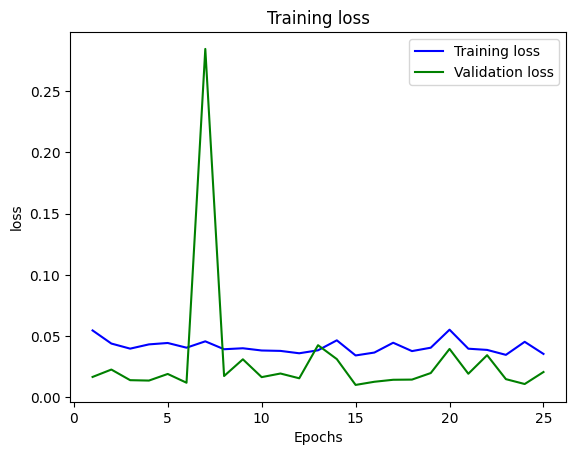

1618/1618 [==============================] - 2s 990us/step


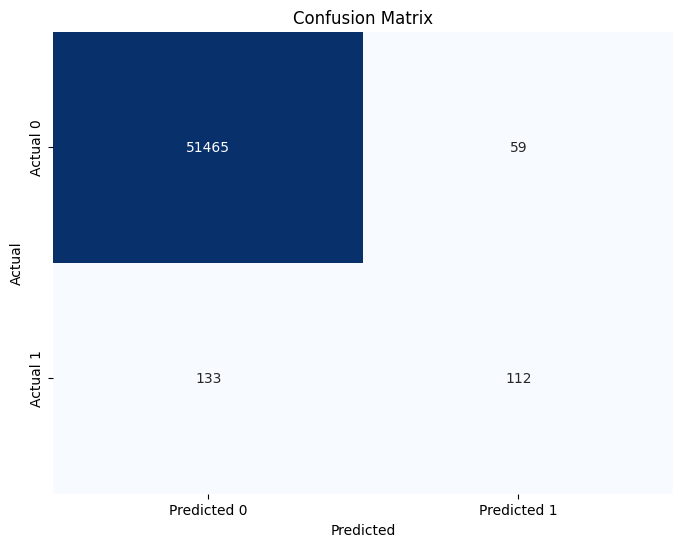

Accuracy: 0.9962912167513377
Precision: 0.6549707602339181
Recall: 0.45714285714285713
F1-Score: 0.5384615384615384


In [ ]:
from keras.layers import LeakyReLU
# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint ( se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint= ModelCheckpoint(filepath='/tmp/checkpoints',monitor='val_loss', mode='min',save_best_only=True)

desired_ratio = 0.05
total_samples = len(y_train)

num_desired_ones = int(total_samples * desired_ratio)
num_existing_ones = np.sum(y_train == 1)
num_synthetic_ones = num_desired_ones - num_existing_ones
smote = SMOTE(sampling_strategy={1: num_synthetic_ones}, random_state=123)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


#Normalizar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_resampled_normalized = scaler.fit_transform(x_train_resampled)
x_val_normalized = scaler.transform(x_val)
x_test_normalized = scaler.transform(x_test)


modelmistery=keras.Sequential()
modelmistery.add(layers.Dense(4, activation=LeakyReLU(alpha=0.1), input_shape=(len(x_train_resampled[1]),)))
modelmistery.add(layers.Dense(8, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(16, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(1, activation='sigmoid'))
modelmistery.compile(optimizer=Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=[keras.metrics.Accuracy()])
# La función fit recibe los callbacks declarados
history = modelmistery.fit(x=x_train_resampled,y= y_train_resampled, epochs=300, batch_size=32, validation_data=(x_val, y_val),callbacks=[callback_early, callback_checkpoint])

loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()


modelmistery.load_weights('/tmp/checkpoints')
predictions= modelmistery.predict(x_test)
df_y=pd.DataFrame(np.concatenate((predictions, y_test.reshape(-1,1)),axis=1), columns=['predictions','true'])
df_y['predict_bin']=(df_y['predictions']>0.5).astype(int)


confusion = confusion_matrix(df_y['true'].astype(int), df_y['predict_bin'])

# crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


y_pred = df_y['predict_bin']
y_true = df_y['true'].astype(int)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

#### nTiene un mejor comportamiento en la precisión del modelo.

### Ajuste de metricas del modelo

Epoch 1/300
13467/13467 [==============================] - 26s 2ms/step - loss: 0.2445 - recall: 0.6635 - val_loss: 0.0263 - val_recall: 0.6721
Epoch 2/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.0471 - recall: 0.7746 - val_loss: 0.0113 - val_recall: 0.4918
Epoch 3/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.0491 - recall: 0.8080 - val_loss: 0.0211 - val_recall: 0.8402
Epoch 4/300
13467/13467 [==============================] - 23s 2ms/step - loss: 0.0506 - recall: 0.8225 - val_loss: 0.0161 - val_recall: 0.6066
Epoch 5/300
13467/13467 [==============================] - 23s 2ms/step - loss: 0.0474 - recall: 0.8396 - val_loss: 0.0338 - val_recall: 0.8730
Epoch 6/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.0481 - recall: 0.8235 - val_loss: 0.0254 - val_recall: 0.8770
Epoch 7/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.0405 - recall: 0.8355 - val_loss: 0.0234 - val_recall:

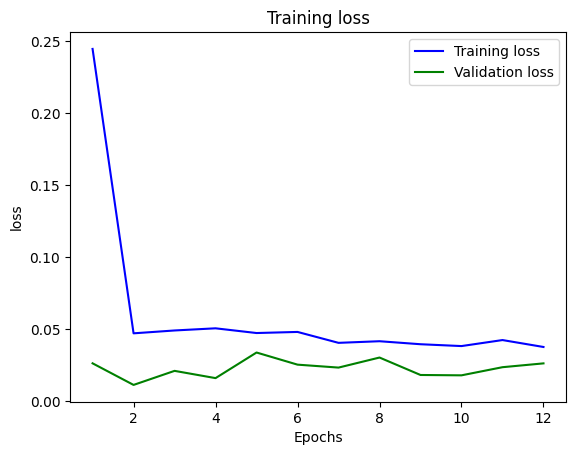

1618/1618 [==============================] - 2s 1ms/step


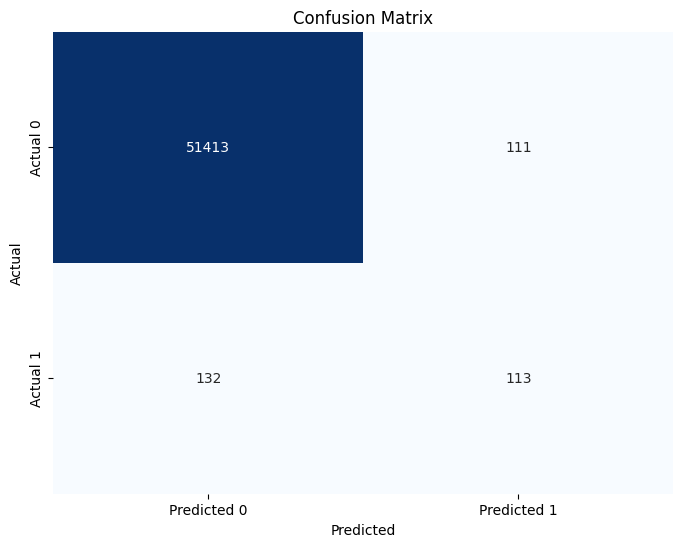

Accuracy: 0.9953060712009117
Precision: 0.5044642857142857
Recall: 0.46122448979591835
F1-Score: 0.48187633262260127


In [ ]:
from keras.layers import LeakyReLU
from keras.metrics import Recall
# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint ( se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint= ModelCheckpoint(filepath='/tmp/checkpoints',monitor='val_loss', mode='min',save_best_only=True)

desired_ratio = 0.05
total_samples = len(y_train)

num_desired_ones = int(total_samples * desired_ratio)
num_existing_ones = np.sum(y_train == 1)
num_synthetic_ones = num_desired_ones - num_existing_ones
smote = SMOTE(sampling_strategy={1: num_synthetic_ones}, random_state=123)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


#Normalizar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_resampled_normalized = scaler.fit_transform(x_train_resampled)
x_val_normalized = scaler.transform(x_val)
x_test_normalized = scaler.transform(x_test)


modelmistery=keras.Sequential()
modelmistery.add(layers.Dense(4, activation=LeakyReLU(alpha=0.1), input_shape=(len(x_train_resampled[1]),)))
modelmistery.add(layers.Dense(8, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(16, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(1, activation='sigmoid'))
modelmistery.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=[Recall()])
# La función fit recibe los callbacks declarados
history = modelmistery.fit(x=x_train_resampled,y= y_train_resampled, epochs=300, batch_size=32, validation_data=(x_val, y_val),callbacks=[callback_early, callback_checkpoint])

loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()


modelmistery.load_weights('/tmp/checkpoints')
predictions= modelmistery.predict(x_test)
df_y=pd.DataFrame(np.concatenate((predictions, y_test.reshape(-1,1)),axis=1), columns=['predictions','true'])
df_y['predict_bin']=(df_y['predictions']>0.5).astype(int)


confusion = confusion_matrix(df_y['true'].astype(int), df_y['predict_bin'])

# crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


y_pred = df_y['predict_bin']
y_true = df_y['true'].astype(int)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

#### Comportamiento más estable pero empeoraron metricas finales

### Cambio de parametros optimizador (Learning rate 0.0001)

Epoch 1/300
13467/13467 [==============================] - 28s 2ms/step - loss: 0.1255 - accuracy: 0.0010 - val_loss: 0.0282 - val_accuracy: 0.0000e+00
Epoch 2/300
13467/13467 [==============================] - 24s 2ms/step - loss: 0.0570 - accuracy: 0.0033 - val_loss: 0.0200 - val_accuracy: 0.0121
Epoch 3/300
13467/13467 [==============================] - 24s 2ms/step - loss: 0.0427 - accuracy: 0.0246 - val_loss: 0.0194 - val_accuracy: 0.0336
Epoch 4/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.0384 - accuracy: 0.0355 - val_loss: 0.0201 - val_accuracy: 0.0440
Epoch 5/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.0362 - accuracy: 0.0470 - val_loss: 0.0246 - val_accuracy: 0.0609
Epoch 6/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.0348 - accuracy: 0.0715 - val_loss: 0.0263 - val_accuracy: 0.0828
Epoch 7/300
13467/13467 [==============================] - 24s 2ms/step - loss: 0.0337 - accuracy: 0.0916 - 

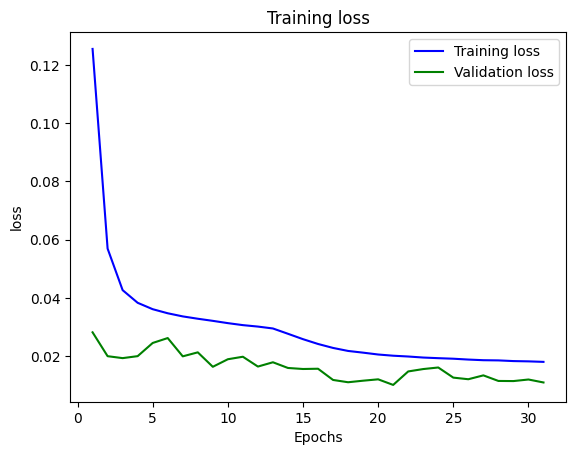

1618/1618 [==============================] - 2s 928us/step


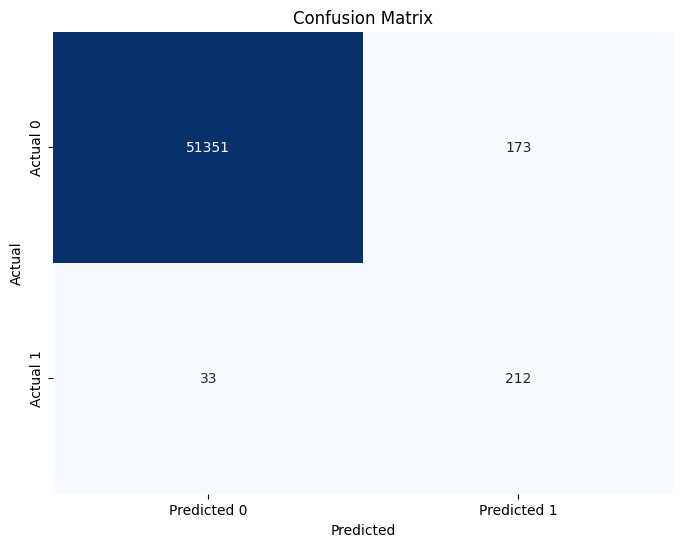

Accuracy: 0.9960207846394561
Precision: 0.5506493506493506
Recall: 0.8653061224489796
F1-Score: 0.6730158730158731


In [ ]:
from keras.layers import LeakyReLU
# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint ( se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint= ModelCheckpoint(filepath='/tmp/checkpoints',monitor='val_loss', mode='min',save_best_only=True)

desired_ratio = 0.05
total_samples = len(y_train)

num_desired_ones = int(total_samples * desired_ratio)
num_existing_ones = np.sum(y_train == 1)
num_synthetic_ones = num_desired_ones - num_existing_ones
smote = SMOTE(sampling_strategy={1: num_synthetic_ones}, random_state=123)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


#Normalizar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_resampled_normalized = scaler.fit_transform(x_train_resampled)
x_val_normalized = scaler.transform(x_val)
x_test_normalized = scaler.transform(x_test)


modelmistery=keras.Sequential()
modelmistery.add(layers.Dense(4, activation=LeakyReLU(alpha=0.1), input_shape=(len(x_train_resampled[1]),)))
modelmistery.add(layers.Dense(8, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(16, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(1, activation='sigmoid'))
modelmistery.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=[keras.metrics.Accuracy()])
# La función fit recibe los callbacks declarados
history = modelmistery.fit(x=x_train_resampled,y= y_train_resampled, epochs=300, batch_size=32, validation_data=(x_val, y_val),callbacks=[callback_early, callback_checkpoint])

loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()


modelmistery.load_weights('/tmp/checkpoints')
predictions= modelmistery.predict(x_test)
df_y=pd.DataFrame(np.concatenate((predictions, y_test.reshape(-1,1)),axis=1), columns=['predictions','true'])
df_y['predict_bin']=(df_y['predictions']>0.5).astype(int)


confusion = confusion_matrix(df_y['true'].astype(int), df_y['predict_bin'])

# crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


y_pred = df_y['predict_bin']
y_true = df_y['true'].astype(int)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

#### Este modelo tuvoel mejor recall, se probará nuevamente

### Learning rate  0.0001 nuevamente

Epoch 1/300
13467/13467 [==============================] - 31s 2ms/step - loss: 0.4441 - accuracy: 0.0284 - val_loss: 0.0453 - val_accuracy: 0.0024
Epoch 2/300
13467/13467 [==============================] - 23s 2ms/step - loss: 0.0645 - accuracy: 0.0343 - val_loss: 0.0202 - val_accuracy: 0.0762
Epoch 3/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.0411 - accuracy: 0.0870 - val_loss: 0.0239 - val_accuracy: 0.1020
Epoch 4/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.0391 - accuracy: 0.1004 - val_loss: 0.0136 - val_accuracy: 0.1126
Epoch 5/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.0378 - accuracy: 0.1069 - val_loss: 0.0246 - val_accuracy: 0.1154
Epoch 6/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.0367 - accuracy: 0.1128 - val_loss: 0.0169 - val_accuracy: 0.1253
Epoch 7/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.0358 - accuracy: 0.1199 - val_

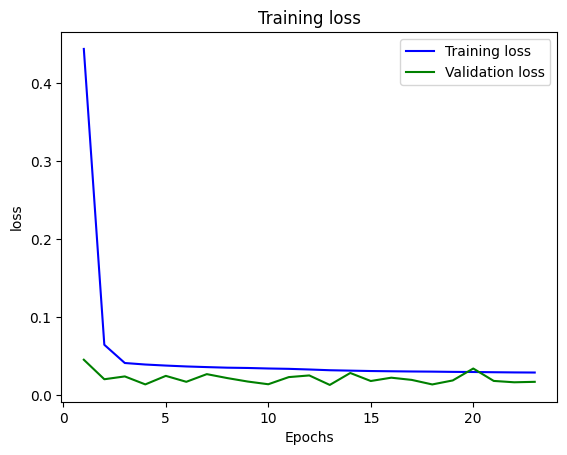

1618/1618 [==============================] - 2s 948us/step


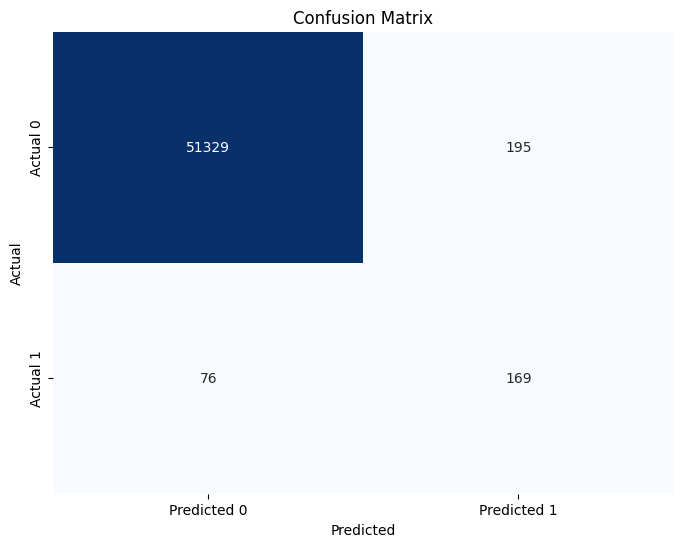

Accuracy: 0.9947652069771485
Precision: 0.4642857142857143
Recall: 0.689795918367347
F1-Score: 0.5550082101806241


In [ ]:
from keras.layers import LeakyReLU
# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint ( se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint= ModelCheckpoint(filepath='/tmp/checkpoints',monitor='val_loss', mode='min',save_best_only=True)

desired_ratio = 0.05
total_samples = len(y_train)

num_desired_ones = int(total_samples * desired_ratio)
num_existing_ones = np.sum(y_train == 1)
num_synthetic_ones = num_desired_ones - num_existing_ones
smote = SMOTE(sampling_strategy={1: num_synthetic_ones}, random_state=123)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


#Normalizar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_resampled_normalized = scaler.fit_transform(x_train_resampled)
x_val_normalized = scaler.transform(x_val)
x_test_normalized = scaler.transform(x_test)


modelmistery=keras.Sequential()
modelmistery.add(layers.Dense(4, activation=LeakyReLU(alpha=0.1), input_shape=(len(x_train_resampled[1]),)))
modelmistery.add(layers.Dense(8, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(16, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(1, activation='sigmoid'))
modelmistery.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=[keras.metrics.Accuracy()])
# La función fit recibe los callbacks declarados
history = modelmistery.fit(x=x_train_resampled,y= y_train_resampled, epochs=300, batch_size=32, validation_data=(x_val, y_val),callbacks=[callback_early, callback_checkpoint])

loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()


modelmistery.load_weights('/tmp/checkpoints')
predictions= modelmistery.predict(x_test)
df_y=pd.DataFrame(np.concatenate((predictions, y_test.reshape(-1,1)),axis=1), columns=['predictions','true'])
df_y['predict_bin']=(df_y['predictions']>0.5).astype(int)


confusion = confusion_matrix(df_y['true'].astype(int), df_y['predict_bin'])

# crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


y_pred = df_y['predict_bin']
y_true = df_y['true'].astype(int)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

#### tiene buen comportamiento, Reducir el learning rate

### Reducir learning rate (0.00001)

Epoch 1/300
13467/13467 [==============================] - 31s 2ms/step - loss: 0.6751 - accuracy: 0.0571 - val_loss: 0.0635 - val_accuracy: 0.0000e+00
Epoch 2/300
13447/13467 [============================>.] - ETA: 0s - loss: 0.1528 - accuracy: 0.0000e+00

13467/13467 [==============================] - 23s 2ms/step - loss: 0.1528 - accuracy: 0.0000e+00 - val_loss: 0.0468 - val_accuracy: 0.0000e+00
Epoch 3/300
13467/13467 [==============================] - 24s 2ms/step - loss: 0.1342 - accuracy: 0.0000e+00 - val_loss: 0.0407 - val_accuracy: 0.0000e+00
Epoch 4/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.1270 - accuracy: 0.0000e+00 - val_loss: 0.0488 - val_accuracy: 0.0000e+00
Epoch 5/300
13467/13467 [==============================] - 23s 2ms/step - loss: 0.1216 - accuracy: 0.0000e+00 - val_loss: 0.0395 - val_accuracy: 0.0000e+00
Epoch 6/300
13467/13467 [==============================] - 24s 2ms/step - loss: 0.1168 - accuracy: 0.0000e+00 - val_loss: 0.0412 - val_accuracy: 0.0000e+00
Epoch 7/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.1124 - accuracy: 0.0000e+00 - val_loss: 0.0456 - val_accuracy: 0.0000e+00
Epoch 8/300
13467/13467 [==============================] - 22s 2ms/step - lo

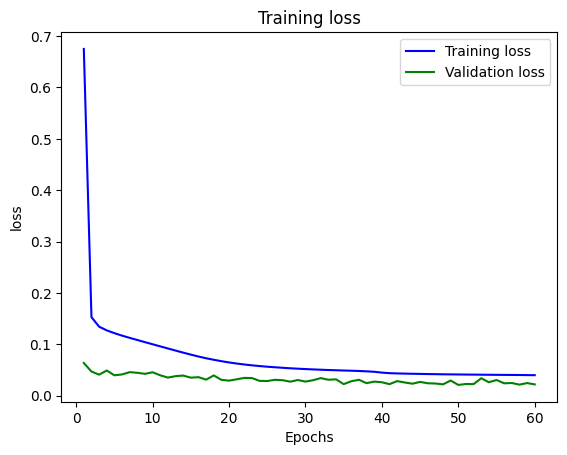

1618/1618 [==============================] - 2s 966us/step


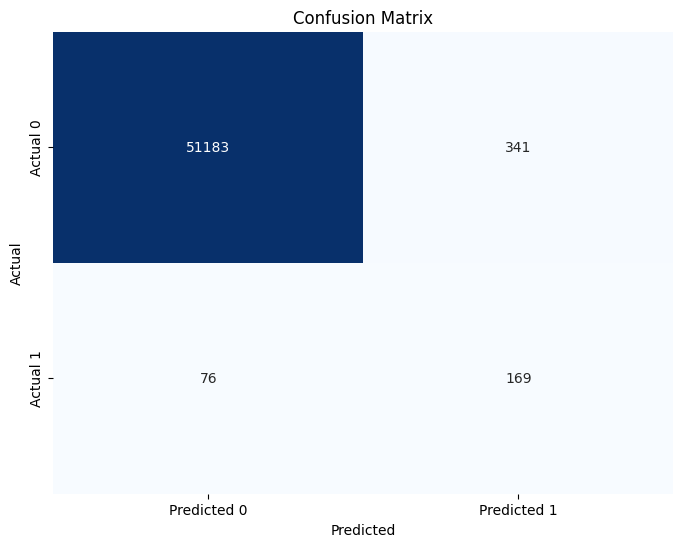

Accuracy: 0.9919449863818115
Precision: 0.33137254901960783
Recall: 0.689795918367347
F1-Score: 0.44768211920529805


In [ ]:
from keras.layers import LeakyReLU
# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint ( se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint= ModelCheckpoint(filepath='/tmp/checkpoints',monitor='val_loss', mode='min',save_best_only=True)

desired_ratio = 0.05
total_samples = len(y_train)

num_desired_ones = int(total_samples * desired_ratio)
num_existing_ones = np.sum(y_train == 1)
num_synthetic_ones = num_desired_ones - num_existing_ones
smote = SMOTE(sampling_strategy={1: num_synthetic_ones}, random_state=123)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


#Normalizar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_resampled_normalized = scaler.fit_transform(x_train_resampled)
x_val_normalized = scaler.transform(x_val)
x_test_normalized = scaler.transform(x_test)


modelmistery=keras.Sequential()
modelmistery.add(layers.Dense(4, activation=LeakyReLU(alpha=0.1), input_shape=(len(x_train_resampled[1]),)))
modelmistery.add(layers.Dense(8, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(16, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(1, activation='sigmoid'))
modelmistery.compile(optimizer=Adam(learning_rate=0.00001),loss='binary_crossentropy',metrics=[keras.metrics.Accuracy()])
# La función fit recibe los callbacks declarados
history = modelmistery.fit(x=x_train_resampled,y= y_train_resampled, epochs=300, batch_size=32, validation_data=(x_val, y_val),callbacks=[callback_early, callback_checkpoint])

loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()


modelmistery.load_weights('/tmp/checkpoints')
predictions= modelmistery.predict(x_test)
df_y=pd.DataFrame(np.concatenate((predictions, y_test.reshape(-1,1)),axis=1), columns=['predictions','true'])
df_y['predict_bin']=(df_y['predictions']>0.5).astype(int)


confusion = confusion_matrix(df_y['true'].astype(int), df_y['predict_bin'])

# crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


y_pred = df_y['predict_bin']
y_true = df_y['true'].astype(int)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

#### Dado que mejorá el modelo, se utilizarán optimizadores con learning rates dinamicos para mejorar la aproximación

### Cambio de optimizador (ADADELTA)

Epoch 1/300
13462/13467 [============================>.] - ETA: 0s - loss: 50.9352 - accuracy: 0.1194

13467/13467 [==============================] - 25s 2ms/step - loss: 50.9174 - accuracy: 0.1194 - val_loss: 0.5628 - val_accuracy: 0.2169
Epoch 2/300
13467/13467 [==============================] - 22s 2ms/step - loss: 1.3899 - accuracy: 0.1850 - val_loss: 0.2658 - val_accuracy: 0.1594
Epoch 3/300
13467/13467 [==============================] - 21s 2ms/step - loss: 1.0677 - accuracy: 0.1319 - val_loss: 0.2358 - val_accuracy: 0.1158
Epoch 4/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.9104 - accuracy: 0.1022 - val_loss: 0.2099 - val_accuracy: 0.0953
Epoch 5/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.8102 - accuracy: 0.0859 - val_loss: 0.2057 - val_accuracy: 0.0824
Epoch 6/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.7332 - accuracy: 0.0752 - val_loss: 0.1892 - val_accuracy: 0.0743
Epoch 7/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.6684 - accuracy: 0.0680 - val_loss: 0.171

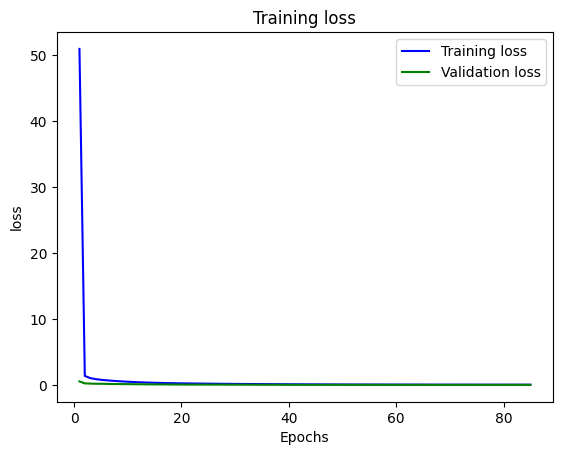

1618/1618 [==============================] - 2s 966us/step


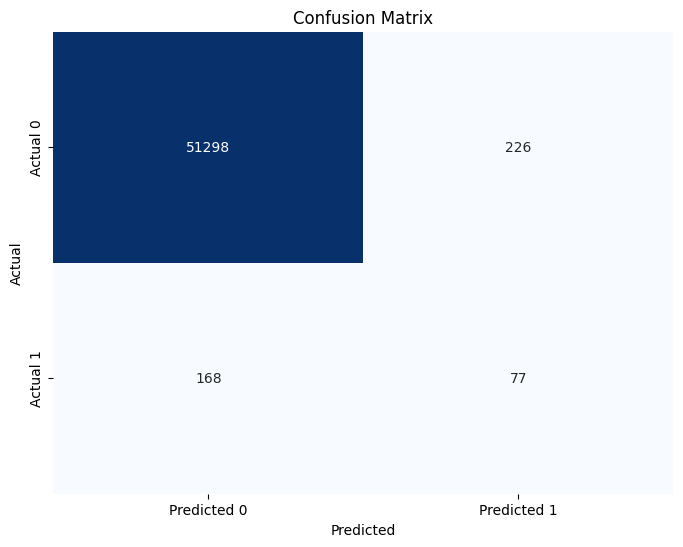

Accuracy: 0.9923892677084741
Precision: 0.25412541254125415
Recall: 0.3142857142857143
F1-Score: 0.28102189781021897


In [ ]:
from keras.layers import LeakyReLU
# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint ( se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint= ModelCheckpoint(filepath='/tmp/checkpoints',monitor='val_loss', mode='min',save_best_only=True)

desired_ratio = 0.05
total_samples = len(y_train)

num_desired_ones = int(total_samples * desired_ratio)
num_existing_ones = np.sum(y_train == 1)
num_synthetic_ones = num_desired_ones - num_existing_ones
smote = SMOTE(sampling_strategy={1: num_synthetic_ones}, random_state=123)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


#Normalizar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_resampled_normalized = scaler.fit_transform(x_train_resampled)
x_val_normalized = scaler.transform(x_val)
x_test_normalized = scaler.transform(x_test)


modelmistery = keras.Sequential()
modelmistery.add(layers.Dense(4, activation=LeakyReLU(alpha=0.1), input_shape=(len(x_train_resampled[1]),)))
modelmistery.add(layers.Dense(8, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(16, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(1, activation='sigmoid'))

# Compile the model with Adadelta optimizer
modelmistery.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=[keras.metrics.Accuracy()])

# The rest of your code remains the same
history = modelmistery.fit(x=x_train_resampled, y=y_train_resampled, epochs=300, batch_size=32, validation_data=(x_val, y_val), callbacks=[callback_early, callback_checkpoint])

loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()


modelmistery.load_weights('/tmp/checkpoints')
predictions= modelmistery.predict(x_test)
df_y=pd.DataFrame(np.concatenate((predictions, y_test.reshape(-1,1)),axis=1), columns=['predictions','true'])
df_y['predict_bin']=(df_y['predictions']>0.5).astype(int)


confusion = confusion_matrix(df_y['true'].astype(int), df_y['predict_bin'])

# crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


y_pred = df_y['predict_bin']
y_true = df_y['true'].astype(int)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

#### El modelo no mejoró, se utilizará FTRL

### Optimizador FTRL

Epoch 1/300
13467/13467 [==============================] - 26s 2ms/step - loss: 0.5443 - accuracy: 0.0592 - val_loss: 0.1327 - val_accuracy: 0.0509
Epoch 2/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.3119 - accuracy: 0.0543 - val_loss: 0.0882 - val_accuracy: 0.0578
Epoch 3/300
13467/13467 [==============================] - 23s 2ms/step - loss: 0.2302 - accuracy: 0.0565 - val_loss: 0.0709 - val_accuracy: 0.0575
Epoch 4/300
13454/13467 [============================>.] - ETA: 0s - loss: 0.1816 - accuracy: 0.0570

13467/13467 [==============================] - 23s 2ms/step - loss: 0.1816 - accuracy: 0.0570 - val_loss: 0.0608 - val_accuracy: 0.0593
Epoch 5/300
13467/13467 [==============================] - 23s 2ms/step - loss: 0.1494 - accuracy: 0.0581 - val_loss: 0.0582 - val_accuracy: 0.0587
Epoch 6/300
13467/13467 [==============================] - 23s 2ms/step - loss: 0.1268 - accuracy: 0.0587 - val_loss: 0.0463 - val_accuracy: 0.0603
Epoch 7/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.1106 - accuracy: 0.0592 - val_loss: 0.0409 - val_accuracy: 0.0612
Epoch 8/300
13467/13467 [==============================] - 23s 2ms/step - loss: 0.0986 - accuracy: 0.0596 - val_loss: 0.0442 - val_accuracy: 0.0604
Epoch 9/300
13467/13467 [==============================] - 23s 2ms/step - loss: 0.0897 - accuracy: 0.0602 - val_loss: 0.0374 - val_accuracy: 0.0615
Epoch 10/300
13467/13467 [==============================] - 21s 2ms/step - loss: 0.0828 - accuracy: 0.0602 - val_loss: 0.038

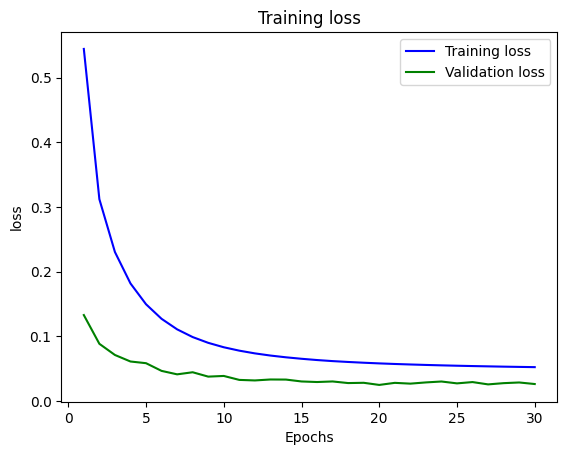

1618/1618 [==============================] - 2s 964us/step


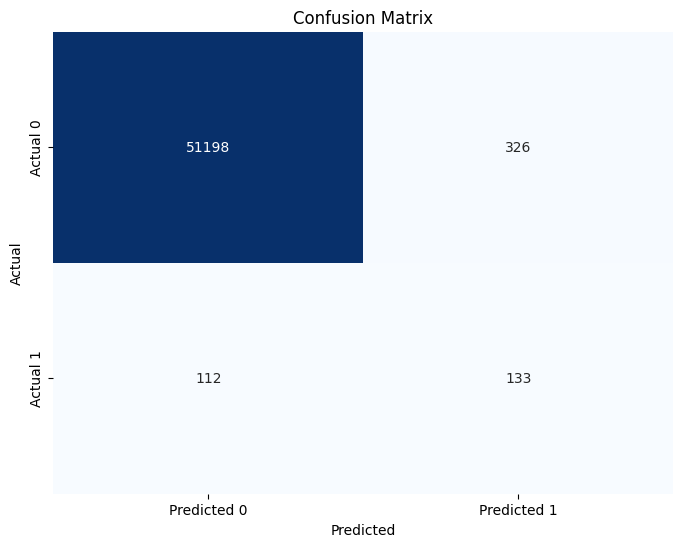

Accuracy: 0.9915393382139891
Precision: 0.289760348583878
Recall: 0.5428571428571428
F1-Score: 0.37784090909090906


In [ ]:
from keras.layers import LeakyReLU
# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint ( se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint= ModelCheckpoint(filepath='/tmp/checkpoints',monitor='val_loss', mode='min',save_best_only=True)

desired_ratio = 0.05
total_samples = len(y_train)

num_desired_ones = int(total_samples * desired_ratio)
num_existing_ones = np.sum(y_train == 1)
num_synthetic_ones = num_desired_ones - num_existing_ones
smote = SMOTE(sampling_strategy={1: num_synthetic_ones}, random_state=123)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


#Normalizar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_resampled_normalized = scaler.fit_transform(x_train_resampled)
x_val_normalized = scaler.transform(x_val)
x_test_normalized = scaler.transform(x_test)


modelmistery = keras.Sequential()
modelmistery.add(layers.Dense(4, activation=LeakyReLU(alpha=0.1), input_shape=(len(x_train_resampled[1]),)))
modelmistery.add(layers.Dense(8, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(16, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(1, activation='sigmoid'))

# Ccompilar con optimizador
modelmistery.compile(optimizer='ftrl', loss='binary_crossentropy', metrics=[keras.metrics.Accuracy()])

history = modelmistery.fit(x=x_train_resampled, y=y_train_resampled, epochs=300, batch_size=32, validation_data=(x_val, y_val), callbacks=[callback_early, callback_checkpoint])

loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()


modelmistery.load_weights('/tmp/checkpoints')
predictions= modelmistery.predict(x_test)
df_y=pd.DataFrame(np.concatenate((predictions, y_test.reshape(-1,1)),axis=1), columns=['predictions','true'])
df_y['predict_bin']=(df_y['predictions']>0.5).astype(int)


confusion = confusion_matrix(df_y['true'].astype(int), df_y['predict_bin'])

# crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


y_pred = df_y['predict_bin']
y_true = df_y['true'].astype(int)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

#### Este optimizador es el más estable de todos pero sacrifica precisión, se repetirá el experimento

### Optimizador FTRL otra vez

Epoch 1/300
13454/13467 [============================>.] - ETA: 0s - loss: 0.1616 - accuracy: 4.5525e-04

13467/13467 [==============================] - 27s 2ms/step - loss: 0.1615 - accuracy: 4.5482e-04 - val_loss: 0.0397 - val_accuracy: 0.0000e+00
Epoch 2/300
13467/13467 [==============================] - 24s 2ms/step - loss: 0.1039 - accuracy: 0.0000e+00 - val_loss: 0.0367 - val_accuracy: 0.0000e+00
Epoch 3/300
13467/13467 [==============================] - 24s 2ms/step - loss: 0.0958 - accuracy: 0.0000e+00 - val_loss: 0.0343 - val_accuracy: 0.0000e+00
Epoch 4/300
13467/13467 [==============================] - 24s 2ms/step - loss: 0.0887 - accuracy: 0.0000e+00 - val_loss: 0.0317 - val_accuracy: 0.0000e+00
Epoch 5/300
13467/13467 [==============================] - 22s 2ms/step - loss: 0.0815 - accuracy: 0.0000e+00 - val_loss: 0.0319 - val_accuracy: 0.0000e+00
Epoch 6/300
13467/13467 [==============================] - 23s 2ms/step - loss: 0.0746 - accuracy: 0.0000e+00 - val_loss: 0.0292 - val_accuracy: 0.0000e+00
Epoch 7/300
13467/13467 [==============================] - 22s 2ms/step - lo

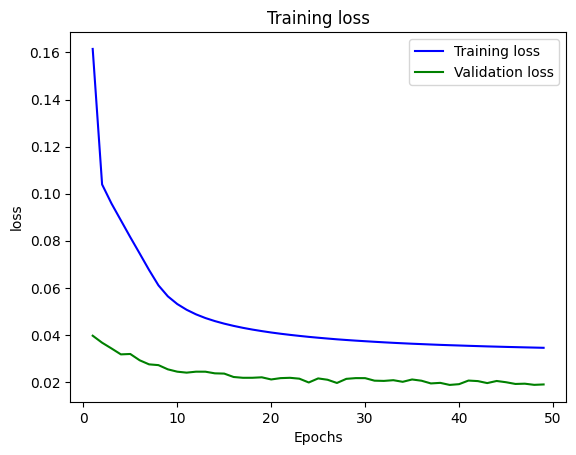

1618/1618 [==============================] - 2s 944us/step


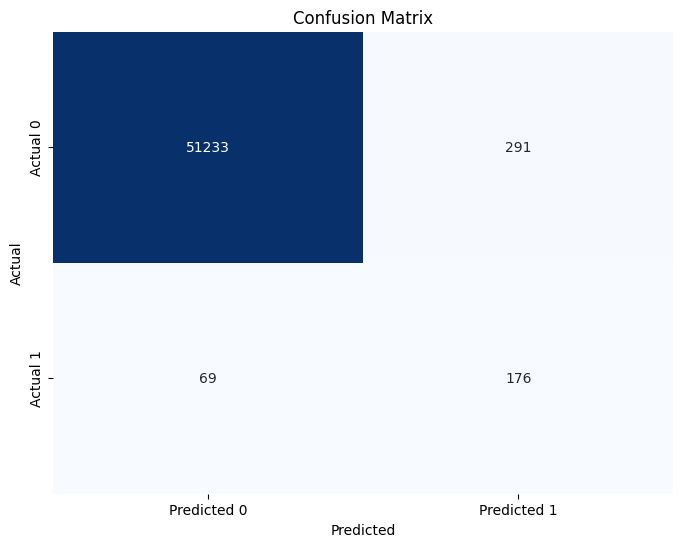

Accuracy: 0.9930460314087581
Precision: 0.37687366167023556
Recall: 0.7183673469387755
F1-Score: 0.49438202247191015


In [ ]:
from keras.layers import LeakyReLU
# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint ( se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint= ModelCheckpoint(filepath='/tmp/checkpoints',monitor='val_loss', mode='min',save_best_only=True)

desired_ratio = 0.05
total_samples = len(y_train)

num_desired_ones = int(total_samples * desired_ratio)
num_existing_ones = np.sum(y_train == 1)
num_synthetic_ones = num_desired_ones - num_existing_ones
smote = SMOTE(sampling_strategy={1: num_synthetic_ones}, random_state=123)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


#Normalizar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_resampled_normalized = scaler.fit_transform(x_train_resampled)
x_val_normalized = scaler.transform(x_val)
x_test_normalized = scaler.transform(x_test)


modelmistery = keras.Sequential()
modelmistery.add(layers.Dense(4, activation=LeakyReLU(alpha=0.1), input_shape=(len(x_train_resampled[1]),)))
modelmistery.add(layers.Dense(8, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(16, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(1, activation='sigmoid'))

# Ccompilar con optimizador
modelmistery.compile(optimizer='ftrl', loss='binary_crossentropy', metrics=[keras.metrics.Accuracy()])

history = modelmistery.fit(x=x_train_resampled, y=y_train_resampled, epochs=300, batch_size=32, validation_data=(x_val, y_val), callbacks=[callback_early, callback_checkpoint])

loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()


modelmistery.load_weights('/tmp/checkpoints')
predictions= modelmistery.predict(x_test)
df_y=pd.DataFrame(np.concatenate((predictions, y_test.reshape(-1,1)),axis=1), columns=['predictions','true'])
df_y['predict_bin']=(df_y['predictions']>0.5).astype(int)


confusion = confusion_matrix(df_y['true'].astype(int), df_y['predict_bin'])

# crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


y_pred = df_y['predict_bin']
y_true = df_y['true'].astype(int)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

#### Dado que presenta un comportamiento estable se comparara otro optimizador

### Usando Nadam



Epoch 1/300
13467/13467 [==============================] - 42s 3ms/step - loss: 0.0514 - accuracy: 0.9794 - val_loss: 0.0140 - val_accuracy: 0.9941
Epoch 2/300
13446/13467 [============================>.] - ETA: 0s - loss: 0.0398 - accuracy: 0.9834

13467/13467 [==============================] - 78s 6ms/step - loss: 0.0398 - accuracy: 0.9834 - val_loss: 0.0121 - val_accuracy: 0.9947
Epoch 3/300
13467/13467 [==============================] - 26s 2ms/step - loss: 0.0395 - accuracy: 0.9838 - val_loss: 0.0177 - val_accuracy: 0.9914
Epoch 4/300
13467/13467 [==============================] - 26s 2ms/step - loss: 0.0377 - accuracy: 0.9845 - val_loss: 0.0171 - val_accuracy: 0.9923
Epoch 5/300
13467/13467 [==============================] - 25s 2ms/step - loss: 0.0402 - accuracy: 0.9839 - val_loss: 0.0157 - val_accuracy: 0.9918
Epoch 6/300
13467/13467 [==============================] - 26s 2ms/step - loss: 0.0370 - accuracy: 0.9847 - val_loss: 0.0170 - val_accuracy: 0.9913
Epoch 7/300
13467/13467 [==============================] - 27s 2ms/step - loss: 0.0420 - accuracy: 0.9839 - val_loss: 0.0210 - val_accuracy: 0.9882
Epoch 8/300
13467/13467 [==============================] - 25s 2ms/step - loss: 0.0388 - accuracy: 0.9843 - val_loss: 0.0423

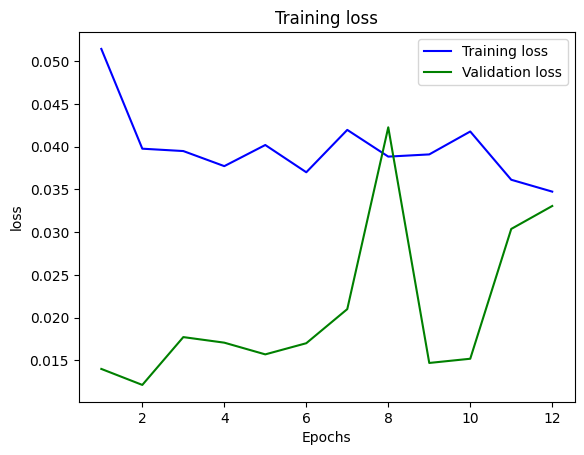

1618/1618 [==============================] - 2s 1ms/step


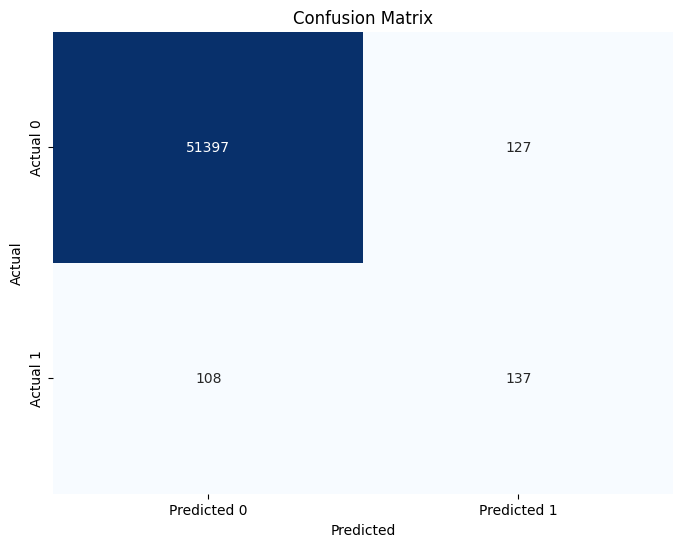

Accuracy: 0.9954606038362727
Precision: 0.5189393939393939
Recall: 0.5591836734693878
F1-Score: 0.5383104125736738


In [ ]:
from keras.layers import LeakyReLU
# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint ( se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint= ModelCheckpoint(filepath='/tmp/checkpoints',monitor='val_loss', mode='min',save_best_only=True)

desired_ratio = 0.05
total_samples = len(y_train)

num_desired_ones = int(total_samples * desired_ratio)
num_existing_ones = np.sum(y_train == 1)
num_synthetic_ones = num_desired_ones - num_existing_ones
smote = SMOTE(sampling_strategy={1: num_synthetic_ones}, random_state=123)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


#Normalizar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_resampled_normalized = scaler.fit_transform(x_train_resampled)
x_val_normalized = scaler.transform(x_val)
x_test_normalized = scaler.transform(x_test)


from keras.optimizers import Nadam

modelmistery = keras.Sequential()
modelmistery.add(layers.Dense(4, activation=LeakyReLU(alpha=0.1), input_shape=(len(x_train_resampled[1]),)))
modelmistery.add(layers.Dense(8, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(16, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(1, activation='sigmoid'))


optimizer = Nadam(learning_rate=0.01)
modelmistery.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


history = modelmistery.fit(x=x_train_resampled,y= y_train_resampled, epochs=300, batch_size=32, validation_data=(x_val, y_val),callbacks=[callback_early, callback_checkpoint])

loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()


modelmistery.load_weights('/tmp/checkpoints')
predictions= modelmistery.predict(x_test)
df_y=pd.DataFrame(np.concatenate((predictions, y_test.reshape(-1,1)),axis=1), columns=['predictions','true'])
df_y['predict_bin']=(df_y['predictions']>0.5).astype(int)


confusion = confusion_matrix(df_y['true'].astype(int), df_y['predict_bin'])

# crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


y_pred = df_y['predict_bin']
y_true = df_y['true'].astype(int)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

#### Aunque presenta el mejor error, es inestable, por lo que se utilizará el modelo  ADAM, se intentara aumentar las neuronas o capas

### Utilizando leakyrelu + capas optimizador adam con 0.0001 y + Neuronas

Epoch 1/300
13467/13467 [==============================] - 31s 2ms/step - loss: 1.1109 - accuracy: 0.0120 - val_loss: 0.0418 - val_accuracy: 0.0129
Epoch 2/300
13467/13467 [==============================] - 23s 2ms/step - loss: 0.0512 - accuracy: 0.0214 - val_loss: 0.0541 - val_accuracy: 0.0178
Epoch 3/300
13467/13467 [==============================] - 24s 2ms/step - loss: 0.0459 - accuracy: 0.0271 - val_loss: 0.0104 - val_accuracy: 0.0359
Epoch 4/300
13467/13467 [==============================] - 24s 2ms/step - loss: 0.0415 - accuracy: 0.0341 - val_loss: 0.0208 - val_accuracy: 0.0378
Epoch 5/300
13467/13467 [==============================] - 23s 2ms/step - loss: 0.0388 - accuracy: 0.0450 - val_loss: 0.0144 - val_accuracy: 0.0509
Epoch 6/300
13467/13467 [==============================] - 23s 2ms/step - loss: 0.0352 - accuracy: 0.0429 - val_loss: 0.0224 - val_accuracy: 0.0443
Epoch 7/300
13467/13467 [==============================] - 23s 2ms/step - loss: 0.0326 - accuracy: 0.0484 - val_

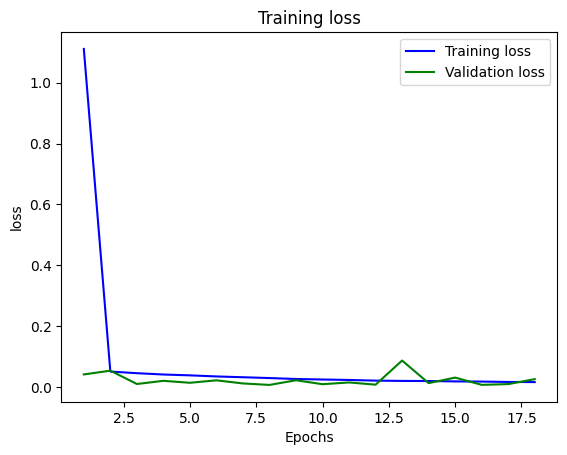

1618/1618 [==============================] - 2s 1ms/step


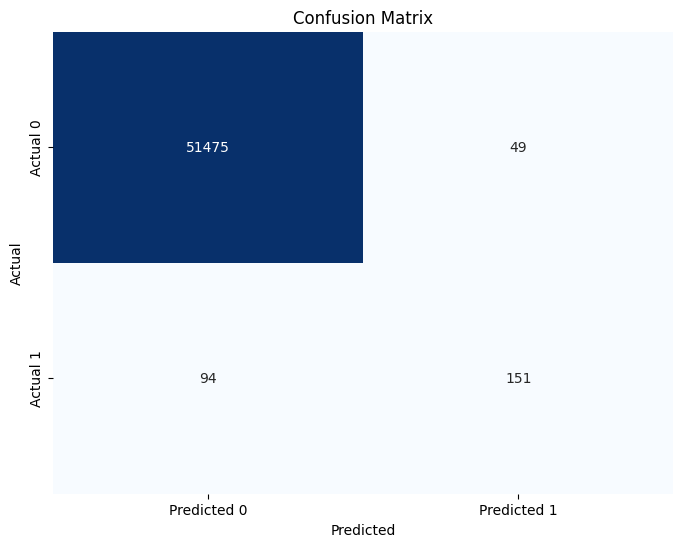

Accuracy: 0.9972377291429234
Precision: 0.755
Recall: 0.6163265306122448
F1-Score: 0.6786516853932584


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

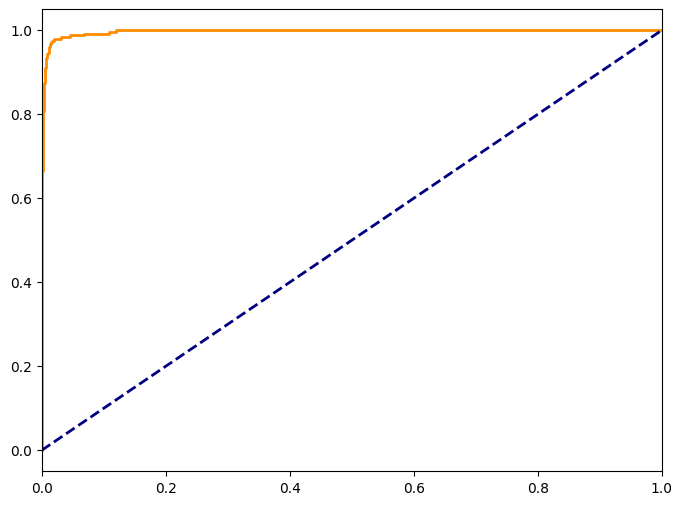

In [ ]:
from keras.layers import LeakyReLU
# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint ( se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint= ModelCheckpoint(filepath='/tmp/checkpoints',monitor='val_loss', mode='min',save_best_only=True)

desired_ratio = 0.05
total_samples = len(y_train)

num_desired_ones = int(total_samples * desired_ratio)
num_existing_ones = np.sum(y_train == 1)
num_synthetic_ones = num_desired_ones - num_existing_ones
smote = SMOTE(sampling_strategy={1: num_synthetic_ones}, random_state=123)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


#Normalizar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_resampled_normalized = scaler.fit_transform(x_train_resampled)
x_val_normalized = scaler.transform(x_val)
x_test_normalized = scaler.transform(x_test)


modelmistery=keras.Sequential()
modelmistery.add(layers.Dense(16, activation=LeakyReLU(alpha=0.1), input_shape=(len(x_train_resampled[1]),)))
modelmistery.add(layers.Dense(32, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(64, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(1, activation='sigmoid'))
modelmistery.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=[keras.metrics.Accuracy()])
# La función fit recibe los callbacks declarados
history = modelmistery.fit(x=x_train_resampled,y= y_train_resampled, epochs=300, batch_size=32, validation_data=(x_val, y_val),callbacks=[callback_early, callback_checkpoint])

loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()


modelmistery.load_weights('/tmp/checkpoints')
predictions= modelmistery.predict(x_test)
df_y=pd.DataFrame(np.concatenate((predictions, y_test.reshape(-1,1)),axis=1), columns=['predictions','true'])
df_y['predict_bin']=(df_y['predictions']>0.5).astype(int)


confusion = confusion_matrix(df_y['true'].astype(int), df_y['predict_bin'])

# crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


y_pred = df_y['predict_bin']
y_true = df_y['true'].astype(int)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

from sklearn.metrics import roc_curve, auc
# CURVA ROC
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt

#### El mejor modelo hasta el momento, se incrementaran los layers

Epoch 1/300
13467/13467 [==============================] - 102s 7ms/step - loss: 0.0741 - accuracy: 0.0242 - val_loss: 0.0112 - val_accuracy: 0.0535
Epoch 2/300
13467/13467 [==============================] - 26s 2ms/step - loss: 0.0354 - accuracy: 0.1128 - val_loss: 0.0085 - val_accuracy: 0.1922
Epoch 3/300
13467/13467 [==============================] - 25s 2ms/step - loss: 0.0281 - accuracy: 0.1113 - val_loss: 0.0079 - val_accuracy: 0.0866
Epoch 4/300
13467/13467 [==============================] - 25s 2ms/step - loss: 0.0230 - accuracy: 0.1196 - val_loss: 0.0114 - val_accuracy: 0.1449
Epoch 5/300
13467/13467 [==============================] - 26s 2ms/step - loss: 0.0195 - accuracy: 0.1259 - val_loss: 0.0058 - val_accuracy: 0.1694
Epoch 6/300
13467/13467 [==============================] - 25s 2ms/step - loss: 0.0178 - accuracy: 0.1383 - val_loss: 0.0090 - val_accuracy: 0.1543
Epoch 7/300
13467/13467 [==============================] - 24s 2ms/step - loss: 0.0162 - accuracy: 0.1573 - val

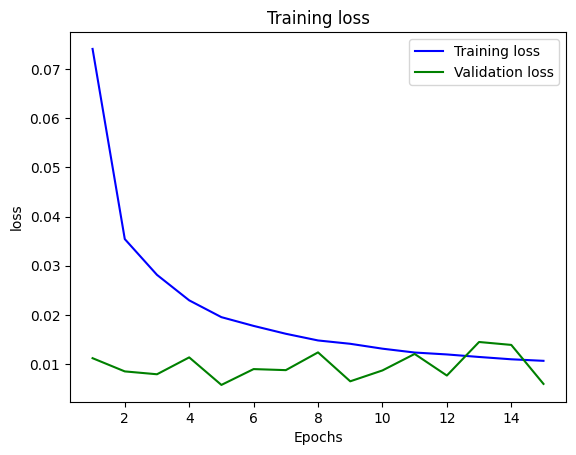

1618/1618 [==============================] - 2s 1ms/step


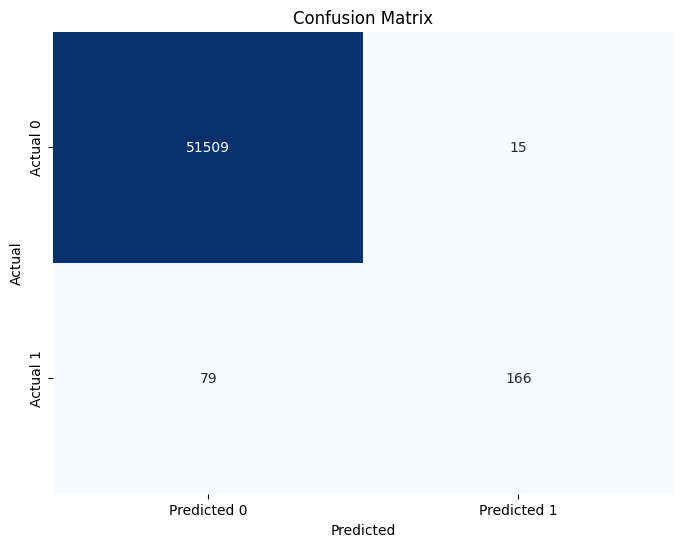

Accuracy: 0.998184241534509
Precision: 0.9171270718232044
Recall: 0.6775510204081633
F1-Score: 0.7793427230046949


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

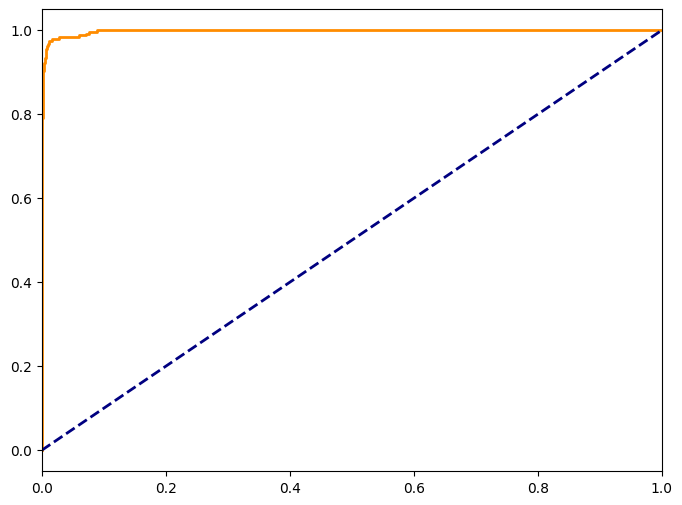

In [ ]:
from keras.layers import LeakyReLU
# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint ( se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint= ModelCheckpoint(filepath='/tmp/checkpoints',monitor='val_loss', mode='min',save_best_only=True)

desired_ratio = 0.05
total_samples = len(y_train)

num_desired_ones = int(total_samples * desired_ratio)
num_existing_ones = np.sum(y_train == 1)
num_synthetic_ones = num_desired_ones - num_existing_ones
smote = SMOTE(sampling_strategy={1: num_synthetic_ones}, random_state=123)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


#Normalizar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_resampled_normalized = scaler.fit_transform(x_train_resampled)
x_val_normalized = scaler.transform(x_val)
x_test_normalized = scaler.transform(x_test)


modelmistery=keras.Sequential()
modelmistery.add(layers.Dense(16, activation=LeakyReLU(alpha=0.1), input_shape=(len(x_train_resampled[1]),)))
modelmistery.add(layers.Dense(32, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(64, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(128, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(1, activation='sigmoid'))
modelmistery.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=[keras.metrics.Accuracy()])
# La función fit recibe los callbacks declarados
history = modelmistery.fit(x=x_train_resampled,y= y_train_resampled, epochs=300, batch_size=32, validation_data=(x_val, y_val),callbacks=[callback_early, callback_checkpoint])

loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()


modelmistery.load_weights('/tmp/checkpoints')
predictions= modelmistery.predict(x_test)
df_y=pd.DataFrame(np.concatenate((predictions, y_test.reshape(-1,1)),axis=1), columns=['predictions','true'])
df_y['predict_bin']=(df_y['predictions']>0.5).astype(int)


confusion = confusion_matrix(df_y['true'].astype(int), df_y['predict_bin'])

# crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


y_pred = df_y['predict_bin']
y_true = df_y['true'].astype(int)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

from sklearn.metrics import roc_curve, auc
# CURVA ROC
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt

#### El mejor modelo, se incrementaran capas para mejorar el RECALL

### Mas capas para mejorar Recall

Epoch 1/300
13467/13467 [==============================] - 80s 6ms/step - loss: 0.0773 - accuracy: 8.9804e-04 - val_loss: 0.0117 - val_accuracy: 0.0180
Epoch 2/300
13467/13467 [==============================] - 59s 4ms/step - loss: 0.0261 - accuracy: 0.0181 - val_loss: 0.0122 - val_accuracy: 0.0262
Epoch 3/300
13467/13467 [==============================] - 58s 4ms/step - loss: 0.0192 - accuracy: 0.0368 - val_loss: 0.0101 - val_accuracy: 0.0341
Epoch 4/300
13467/13467 [==============================] - 58s 4ms/step - loss: 0.0164 - accuracy: 0.0581 - val_loss: 0.0134 - val_accuracy: 0.0681
Epoch 5/300
13457/13467 [============================>.] - ETA: 0s - loss: 0.0146 - accuracy: 0.0652

13467/13467 [==============================] - 60s 4ms/step - loss: 0.0146 - accuracy: 0.0652 - val_loss: 0.0085 - val_accuracy: 0.0466
Epoch 6/300
13467/13467 [==============================] - 61s 5ms/step - loss: 0.0135 - accuracy: 0.0867 - val_loss: 0.0273 - val_accuracy: 0.0692
Epoch 7/300
13467/13467 [==============================] - 62s 5ms/step - loss: 0.0124 - accuracy: 0.1028 - val_loss: 0.0057 - val_accuracy: 0.0868
Epoch 8/300
13467/13467 [==============================] - 62s 5ms/step - loss: 0.0118 - accuracy: 0.1337 - val_loss: 0.0051 - val_accuracy: 0.1859
Epoch 9/300
13467/13467 [==============================] - 60s 4ms/step - loss: 0.0110 - accuracy: 0.1722 - val_loss: 0.0065 - val_accuracy: 0.2834
Epoch 10/300
13467/13467 [==============================] - 61s 5ms/step - loss: 0.0106 - accuracy: 0.1894 - val_loss: 0.0068 - val_accuracy: 0.1515
Epoch 11/300
13467/13467 [==============================] - 63s 5ms/step - loss: 0.0101 - accuracy: 0.1951 - val_loss: 0.01

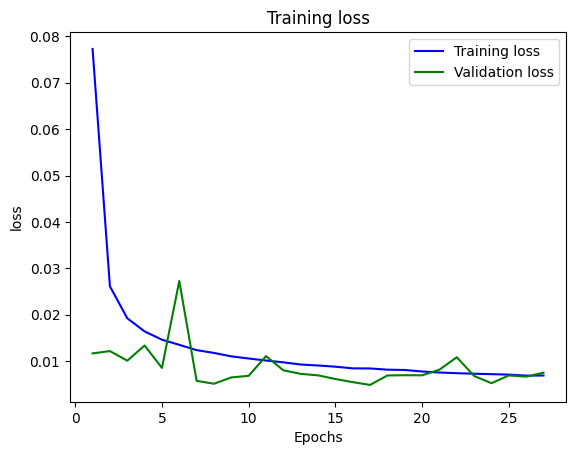

1618/1618 [==============================] - 3s 2ms/step


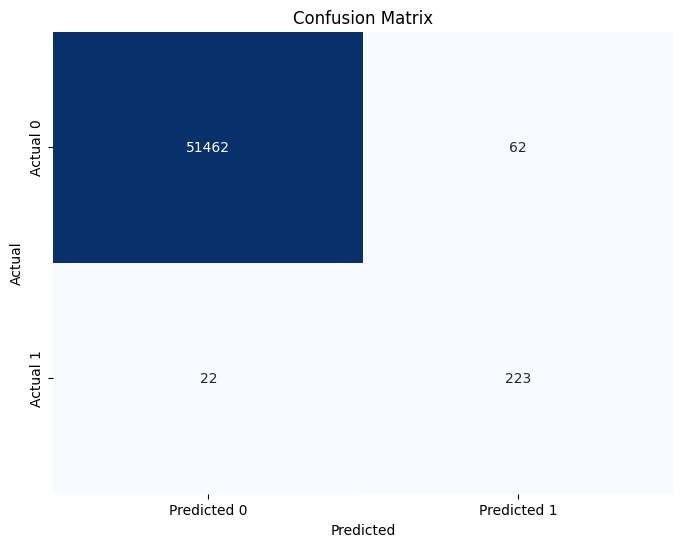

Accuracy: 0.9983774073287103
Precision: 0.7824561403508772
Recall: 0.9102040816326531
F1-Score: 0.8415094339622642


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

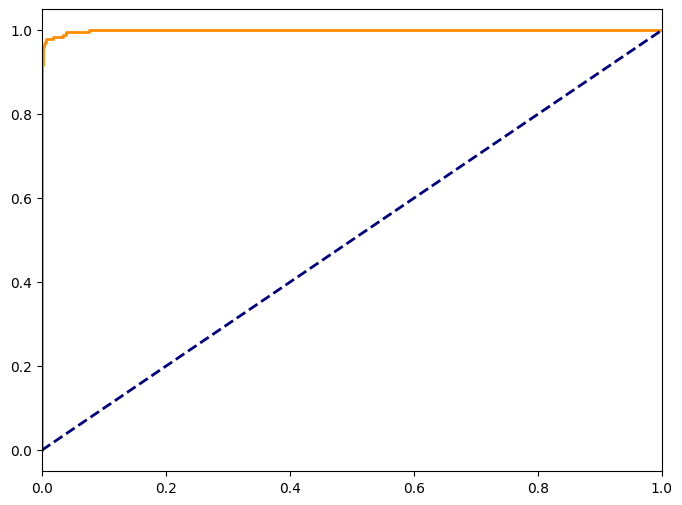

In [ ]:
from keras.layers import LeakyReLU
# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint ( se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint= ModelCheckpoint(filepath='/tmp/checkpoints',monitor='val_loss', mode='min',save_best_only=True)

desired_ratio = 0.05
total_samples = len(y_train)

num_desired_ones = int(total_samples * desired_ratio)
num_existing_ones = np.sum(y_train == 1)
num_synthetic_ones = num_desired_ones - num_existing_ones
smote = SMOTE(sampling_strategy={1: num_synthetic_ones}, random_state=123)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


#Normalizar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_resampled_normalized = scaler.fit_transform(x_train_resampled)
x_val_normalized = scaler.transform(x_val)
x_test_normalized = scaler.transform(x_test)


modelmistery=keras.Sequential()
modelmistery.add(layers.Dense(16, activation=LeakyReLU(alpha=0.1), input_shape=(len(x_train_resampled[1]),)))
modelmistery.add(layers.Dense(32, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(64, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(128, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(256, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(512, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(1, activation='sigmoid'))
modelmistery.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=[keras.metrics.Accuracy()])
# La función fit recibe los callbacks declarados
history = modelmistery.fit(x=x_train_resampled,y= y_train_resampled, epochs=300, batch_size=32, validation_data=(x_val, y_val),callbacks=[callback_early, callback_checkpoint])

loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()


modelmistery.load_weights('/tmp/checkpoints')
predictions= modelmistery.predict(x_test)
df_y=pd.DataFrame(np.concatenate((predictions, y_test.reshape(-1,1)),axis=1), columns=['predictions','true'])
df_y['predict_bin']=(df_y['predictions']>0.5).astype(int)


confusion = confusion_matrix(df_y['true'].astype(int), df_y['predict_bin'])

# crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


y_pred = df_y['predict_bin']
y_true = df_y['true'].astype(int)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

from sklearn.metrics import roc_curve, auc
# CURVA ROC
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt

#### Tiene un excelente comportamiento, se incrementarán capas  hasta que se demore mucho corriendo o no incremente más el f1 score

### 8 Capas, 2048  neuronas

In [ ]:
from keras.layers import LeakyReLU
# Declaración callback de EarlyStopping (si pasan más de 10 épocas y no mejora el error de validación, se para la ejecución)
callback_early = EarlyStopping(monitor='val_loss', mode='min', patience=10)
# Declaración callback checkpoint ( se guarda en el directorio /tmp/checkpoints el modelo con el menor error)
callback_checkpoint= ModelCheckpoint(filepath='/tmp/checkpoints',monitor='val_loss', mode='min',save_best_only=True)

desired_ratio = 0.05
total_samples = len(y_train)

num_desired_ones = int(total_samples * desired_ratio)
num_existing_ones = np.sum(y_train == 1)
num_synthetic_ones = num_desired_ones - num_existing_ones
smote = SMOTE(sampling_strategy={1: num_synthetic_ones}, random_state=123)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


#Normalizar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_resampled_normalized = scaler.fit_transform(x_train_resampled)
x_val_normalized = scaler.transform(x_val)
x_test_normalized = scaler.transform(x_test)


modelmistery=keras.Sequential()
modelmistery.add(layers.Dense(16, activation=LeakyReLU(alpha=0.1), input_shape=(len(x_train_resampled[1]),)))
modelmistery.add(layers.Dense(32, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(64, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(128, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(256, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(512, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(1024, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(2048, activation=LeakyReLU(alpha=0.1)))
modelmistery.add(layers.Dense(1, activation='sigmoid'))
modelmistery.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=[keras.metrics.Accuracy()])
# La función fit recibe los callbacks declarados
history = modelmistery.fit(x=x_train_resampled,y= y_train_resampled, epochs=300, batch_size=32, validation_data=(x_val, y_val),callbacks=[callback_early, callback_checkpoint])

loss = history.history['loss']
val_loss= history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()


modelmistery.load_weights('/tmp/checkpoints')
predictions= modelmistery.predict(x_test)
df_y=pd.DataFrame(np.concatenate((predictions, y_test.reshape(-1,1)),axis=1), columns=['predictions','true'])
df_y['predict_bin']=(df_y['predictions']>0.5).astype(int)


confusion = confusion_matrix(df_y['true'].astype(int), df_y['predict_bin'])

# crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


y_pred = df_y['predict_bin']
y_true = df_y['true'].astype(int)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

from sklearn.metrics import roc_curve, auc
# CURVA ROC
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt

NameError: ignored

#### El modelo funcionó muy bien, pero debido a falta de recursos informaticos, no pudo generar un mejor modelo, con un f1 score de 83% y recall de casi 92% es el modelo a usar